<a href="https://colab.research.google.com/github/dmayade-cm/SENALES-Y-SISTEMAS/blob/main/TALLER_2_PUNTO_1_2_1_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EJERCICIOS TEÓRICO-PRÁCTICOS: Transformada de Fourier, Laplace y Z Señales y Sistemas 2025_2**

***Presentado por: DARLIX AYLENI MAYA DESCANCE cc 1125408693***

# **1 TRANSFORMADA DE FOURIER**

1.2 Explique las semejanzas y diferencias entre la serie de Fou
rier (exponencial, trigonométrica y compacta), la transfor
mada de Fourier, transformada de Fourier en tiempo discre
to (DTFT) y transformada discreta de Fourier (DFT). Consi
dere las diferentes combinaciones entre: espectro continuo y
 discreto y senal en tiempo continuo y discreto. Además, con
sulte en qué consiste el algoritmo Fast Fourier Transform
(FFT) y su utilidad para el cálculo de la transformada dis
creta de Fourier. Explique en detalle el algoritmo FFT y su
 costo computacional vs el de la transformada discreta.

## 1. Series de Fourier: exponencial, trigonométrica y compacta

Las **series de Fourier** permiten representar una señal **periódica** como una combinación de armónicos sinusoidales. La idea general es descomponer una señal periódica en la suma de senos y cosenos, o equivalentemente, en exponenciales complejas.

- **Forma trigonométrica:**  
  Representa la señal como:
  $[
  x(t) = a_0 + \sum_{n=1}^{\infty}\left[a_n\cos(n\omega_0 t) + b_n\sin(n\omega_0 t)\right].
  $]
  Es útil para visualizar los componentes pares (coseno) e impares (seno) de la señal.

- **Forma exponencial (compleja):**  
  Usa la identidad de Euler, y la señal se expresa como:
  $[
  x(t) = sum_{n=-\infty}^{\infty} c_n e^{j n \omega_0 t},
  $]
  donde \(c_n) son coeficientes complejos que contienen información de amplitud y fase.

- **Forma compacta:**  
  Es una versión más sintética:
  $[
  x(t) = A_0 + \sum_{n=1}^{\infty} A_n \cos(n\omega_0 t - \theta_n),
  $]
  donde cada armónico se representa por su amplitud y fase.

**Semejanzas:**  
Todas representan la misma señal periódica, solo cambian las variables (seno-coseno, exponencial compleja o forma polar).

**Diferencias:**  
- La trigonométrica separa en componentes pares e impares.  
- La exponencial simplifica las operaciones algebraicas, especialmente en análisis de sistemas lineales.  
- La compacta facilita la interpretación física (amplitud y fase).

---

## 2. Transformada de Fourier (CTFT), DTFT y DFT

Cuando la señal **ya no es periódica**, la serie de Fourier se convierte en una **transformada de Fourier**, que distribuye la energía de la señal sobre un espectro continuo.

### a) Transformada de Fourier continua (CTFT)
- Se aplica a señales **en tiempo continuo** \(x(t)\) no periódicas.  
- Produce un **espectro continuo en frecuencia**:
  $[
  X(f) = \int_{-\infty}^{\infty} x(t)e^{-j2\pi f t}dt.
  $]
- La frecuencia es una variable continua.

### b) Transformada de Fourier en tiempo discreto (DTFT)
- Se aplica a señales **discretas en el tiempo** pero **infinitas en duración**.  
- Su espectro es **continuo pero periódico** (con periodo $(2\pi$)):
  $[
  X(e^{j\omega}) = \sum_{n=-\infty}^{\infty} x[n] e^{-j\omega n}.
  $]
- Representa cómo la discretización en el tiempo genera periodicidad en el dominio frecuencial.

### c) Transformada discreta de Fourier (DFT)
- Se aplica a señales **discretas y finitas** en el tiempo.  
- Produce un **espectro discreto**:
  $[
  X[k] = \sum_{n=0}^{N-1} x[n] e^{-j 2\pi nk/N}, \quad k = 0, 1, ..., N-1.
  $]
- La DFT puede verse como una versión muestreada de la DTFT.  
- Es la base de todo el procesamiento digital de señales, porque permite analizar la frecuencia de señales almacenadas en un computador.

---

## 3. Combinaciones entre señal y espectro (resumen general)

| Dominio temporal | Dominio frecuencial | Tipo de espectro | Observación principal |
|------------------|--------------------|------------------|------------------------|
| Tiempo continuo | Frecuencia continua | Espectro continuo | Transformada de Fourier (CTFT) |
| Tiempo discreto | Frecuencia continua | Espectro continuo y periódico | Transformada DTFT |
| Tiempo discreto (finito) | Frecuencia discreta | Espectro discreto | Transformada DFT |
| Tiempo continuo periódico | Frecuencia discreta | Coeficientes discretos | Serie de Fourier |

**Conclusión de esta parte:**  
La periodicidad en el tiempo implica discreción en frecuencia, y la discretización en el tiempo implica periodicidad en frecuencia. Esta dualidad es una de las propiedades más elegantes de las transformadas de Fourier.

---

## 4. Algoritmo Fast Fourier Transform (FFT)

La **FFT** (Fast Fourier Transform) es un **algoritmo eficiente** para calcular la **Transformada Discreta de Fourier (DFT)**.  
No es una nueva transformada, sino una forma optimizada de obtener exactamente los mismos resultados que la DFT, pero mucho más rápido.

### Principio de la FFT (radix-2 Cooley–Tukey)
1. Si la longitud \(N\) de la señal es potencia de 2, se divide la DFT en dos partes:  
   - una con las muestras **pares** $(x[0], x[2], x[4],...$),  
   - otra con las **impares** $(x[1], x[3], x[5],...$).
2. Se calculan las DFT de cada mitad (tamaño $(N/2$)).
3. Luego se combinan los resultados con los **twiddle factors**:
   $[
   W_N^k = e^{-j2\pi k/N},
   $]
   que ajustan la fase de las partes para formar el resultado final.
4. Este proceso se repite recursivamente hasta llegar a DFTs de tamaño 1 o 2.

El esquema de cálculo se visualiza mediante estructuras llamadas **"butterflies"**, donde cada par de datos se combina mediante sumas y restas complejas.

### Etapas y operaciones
- Número de etapas: $(\log_2 N$).  
- Operaciones por etapa: \(N/2\) combinaciones.  
- Total:
  - **Multiplicaciones complejas:** $(\frac{N}{2} \log_2 N$).  
  - **Sumas complejas:** $(N \log_2 N$).

---

## 5. Costo computacional: DFT vs FFT

| Algoritmo | Complejidad teórica | Número de operaciones | Comentario |
|------------|--------------------|------------------------|-------------|
| **DFT directa** | $(O(N^2)$) | Cada muestra de salida necesita $(N$) multiplicaciones y sumas | Muy lenta para señales grandes |
| **FFT (radix-2)** | $(O(N \log_2 N)$) | Se divide recursivamente hasta N/2, reduciendo drásticamente el costo | Miles de veces más rápida |

**Ejemplo:**  
Para $(N = 4096$):  
- DFT requiere aproximadamente $(4096^2 = 16.7 \times 10^6$) operaciones.  
- FFT solo necesita $(4096 \times \log_2 4096 = 4096 \times 12 = 49,152$) operaciones.  
→ **Es más de 300 veces más rápida.**

---

## 6. Utilidad práctica del algoritmo FFT

- Es la herramienta fundamental en el análisis espectral digital.  
- Permite realizar operaciones de convolución, filtrado y correlación de manera eficiente.  
- Se usa en procesamiento de audio, imágenes, comunicaciones, análisis de vibraciones, y cualquier aplicación que requiera obtener el contenido frecuencial de una señal.  
- En los programas y librerías (como `numpy.fft`, `scipy.fft`, `fftw`) se utiliza la FFT internamente para acelerar el cálculo de la DFT.

---

#  1.3 Función de densidad espectral (Transformada de Fourier)

#Encuentre la **función de densidad espectral** (Transformada de Fourier) para las siguientes señales, **sin aplicar propiedades**:

#a) $( e^{-a|t|}, \quad a \in \mathbb{R}^+ $)

#b) $( \cos(\omega_c t), \quad \omega_c \in \mathbb{R} $)

#c) $( \sin(\omega_s t), \quad \omega_s \in \mathbb{R} $)

#d) $( f(t)\cos(\omega_c t), \quad \omega_c \in \mathbb{R}, \; f(t) \in \mathbb{R}, \mathbb{C} $)

#e) $( e^{-a|t|^2}, \quad a \in \mathbb{R}^+ $)

#f) $( A\,\text{rect}_d(t), \quad A, d \in \mathbb{R} $)


'

*(Convención: $(X(\omega)=\int_{-\infty}^{\infty}x(t)e^{-j\omega t}dt$))*

A continuación presento la transformada de Fourier \(X(\omega)\) para cada señal solicitada, con la derivación breve y el resultado final. Trabajo en **primera persona** como en la cátedra.

---

## a) $(x(t)=e^{-a|t|},\; a>0\$

Derivo separando la integral en $([0,\infty)$) y $((-\infty,0]$):

$$
X(\omega)=\int_{-\infty}^{\infty} e^{-a|t|}e^{-j\omega t}\,dt
=\int_{0}^{\infty} e^{-at}e^{-j\omega t}\,dt + \int_{-\infty}^{0} e^{at}e^{-j\omega t}\,dt
$$

Evaluando las integrales exponenciales:

$$
X(\omega)=\frac{1}{a+j\omega}+\frac{1}{a-j\omega}=\frac{2a}{a^2+\omega^2}
$$

$$
\boxed{\mathcal{F}\{e^{-a|t|}\}(\omega)=\dfrac{2a}{a^2+\omega^2}}
$$

---

## b) $(x(t)=\cos(\omega_c t)$)

Descompongo en exponenciales:

$$
\cos(\omega_c t)=\frac{1}{2}\big(e^{j\omega_c t}+e^{-j\omega_c t}\big)
$$

Usando que $(\mathcal{F}\{e^{j\omega_0 t}\}=2\pi\delta(\omega-\omega_0)$):

$$
X(\omega)=\pi\,[\delta(\omega-\omega_c)+\delta(\omega+\omega_c)]
$$

$$
\boxed{\mathcal{F}\{\cos(\omega_c t)\}(\omega)=\pi[\delta(\omega-\omega_c)+\delta(\omega+\omega_c)]}
$$

---

## c) $(x(t)=\sin(\omega_s t)$)

Descompongo:

$$
\sin(\omega_s t)=\frac{1}{2j}\big(e^{j\omega_s t}-e^{-j\omega_s t}\big)
$$

Entonces:

$$
X(\omega)=j\pi[\delta(\omega+\omega_s)-\delta(\omega-\omega_s)]
$$

$$
\boxed{\mathcal{F}\{\sin(\omega_s t)\}(\omega)=j\pi[\delta(\omega+\omega_s)-\delta(\omega-\omega_s)]}
$$

---

## d) $(x(t)=f(t)\cos(\omega_c t)$)

Sea $(F(\omega)=\mathcal{F}\{f(t)\}$). Por linealidad y desplazamiento en frecuencia:

$$
f(t)cos(\omega_c t)=\frac{1}{2}f(t)e^{j\omega_c t}+\frac{1}{2}f(t)e^{-j\omega_c t}
$$

$$
\boxed{\mathcal{F}\{f(t)\cos(\omega_c t)\}(\omega)=\tfrac{1}{2}[F(\omega-\omega_c)+F(\omega+\omega_c)]}
$$

---

## e) $(x(t)=e^{-a t^2},\; a>0$)  (Gaussiana)

La transformada de una gaussiana es otra gaussiana:

$$
X(\omega)=\int_{-\infty}^{\infty} e^{-a t^2} e^{-j\omega t}\,dt = \sqrt{\frac{\pi}{a}}\, e^{-\frac{\omega^2}{4a}}
$$

$$
\boxed{\mathcal{F}\{e^{-a t^2}\}(\omega)=\sqrt{\frac{\pi}{a}}\, e^{-\frac{\omega^2}{4a}}}
$$

---

## f) $(x(t)=A\cdot\operatorname{rect}_d(t)$)

Defino $(\operatorname{rect}_d(t)=1$) para $(|t|<d/2$). Entonces:

$$
X(\omega)=A\int_{-d/2}^{d/2} e^{-j\omega t}\,dt
=A\frac{2\sin(\omega d/2)}{\omega}
$$

$$
\boxed{\mathcal{F}\{A\,\operatorname{rect}_d(t)\}(\omega)=A d\,\mathrm{sinc}\!\left(\frac{\omega d}{2}\right)}
$$
---

### Nota sobre convenciones

He usado la **convención angular** $(\omega$). Si se desea expresar en frecuencia $(f$) (Hz), basta reemplazar $(\omega=2\pi f$) y ajustar los factores $(2\pi$) de normalización.


# **1.4 Aplicación de propiedades de la Transformada de Fourier**
#
# Aplique las propiedades de la transformada de Fourier para resolver:
#
# a) $( \mathcal{F}\{e^{-jw_1t} \cos(w_c t)\}, \quad w_1, w_c \in \mathbb{R} $)
#
# b) $( \mathcal{F}\{u(t) \cos^2(w_c t)\}, \quad w_c \in \mathbb{R} $)
#
# c) $( \mathcal{F}^{-1}\left\{ \frac{7}{w^2 + 6w + 45} \right\} * \mathcal{F}^{-1}\left\{ \frac{10}{(8 + j\omega/3)^2} \right\} $)
#
# d) $( \mathcal{F}\{3t^3\} $)
#
# e) $( \frac{B}{T} \sum_{n=-\infty}^{+\infty} \left( \frac{1}{a^2 + (w-n\omega_o)^2} + \frac{1}{a+j(w-n\omega_o)} \right) $)
#
# $( n \in \{0, \pm 1, \pm 2, \ldots\}, \, \omega_o = 2\pi/T \, y \, B, \, T \in \mathbb{R}^+ $)

# *(Convención: $(X(\omega)=\int_{-\infty}^{\infty}x(t)e^{-j\omega t}dt\$)*

<br>

 A continuación presento la transformada de Fourier $(X(\omega)$) para cada señal solicitada, aplicando propiedades de las tablas proporcionadas. Trabajo en **primera persona** como en la cátedra.

<br>

 **a)** $( \mathcal{F}\{e^{-jw_1t} \cos(w_c t)\} $)

 Aplico la propiedad de modulación: $(\mathcal{F}\{e^{j\omega_0 t}f(t)\} = F(\omega - \omega_0)$)

 Primero, de la tabla: $(\mathcal{F}\{\cos(w_c t)\} = \pi[\delta(\omega - w_c) + \delta(\omega + w_c)]$)

 Por la propiedad de modulación con $(\omega_0 = -w_1$):

 $[ \mathcal{F}\{e^{-jw_1t} \cos(w_c t)\} = \pi[\delta(\omega + w_1 - w_c) + \delta(\omega + w_1 + w_c)] $]

 $[ \boxed{\mathcal{F}\{e^{-jw_1t} \cos(w_c t)\}(\omega) = \pi[\delta(\omega + w_1 - w_c) + \delta(\omega + w_1 + w_c)]} $] <br>

<br>

 **b)** $( \mathcal{F}\{u(t) \cos^2(w_c t)\} $)

 Primero simplifico usando identidad trigonométrica:
 $[ \cos^2(w_c t) = \frac{1 + \cos(2w_c t)}{2} $]

 Entonces:
 $[ u(t)\cos^2(w_c t) = \frac{1}{2}u(t) + \frac{1}{2}u(t)\cos(2w_c t) $]

 De la tabla: $(\mathcal{F}\{u(t)\} = \pi\delta(\omega) + \frac{1}{j\omega}$)

 Y también: $(\mathcal{F}\{u(t)\cos(\omega_0 t)\} = \frac{\pi}{2}[\delta(\omega - \omega_0) + \delta(\omega + \omega_0)] + \frac{j\omega}{\omega_0^2 - \omega^2}$)

 Aplicando linealidad:
 $[ \mathcal{F}\{u(t) \cos^2(w_c t)\} = \frac{1}{2}[\pi\delta(\omega) + \frac{1}{j\omega}] + \frac{1}{2}\left[\frac{\pi}{2}[\delta(\omega - 2w_c) + \delta(\omega + 2w_c)] + \frac{j\omega}{4w_c^2 - \omega^2}\right] $]

 $[ \boxed{\mathcal{F}\{u(t) \cos^2(w_c t)\}(\omega) = \frac{\pi}{2}\delta(\omega) + \frac{1}{2j\omega} + \frac{\pi}{4}[\delta(\omega - 2w_c) + \delta(\omega + 2w_c)] + \frac{j\omega}{2(4w_c^2 - \omega^2)}} $]

 <br>

 **c)** $( \mathcal{F}^{-1}\left\{ \frac{7}{w^2 + 6w + 45} \right\} * \mathcal{F}^{-1}\left\{ \frac{10}{(8 + j\omega/3)^2} \right\} $)

 Resuelvo cada transformada inversa por separado:

 **Primer término:** $( \mathcal{F}^{-1}\left\{ \frac{7}{w^2 + 6w + 45} \right\} $)

 Completo el cuadrado:
 $[ w^2 + 6w + 45 = (w + 3)^2 + 36 $]

 De la tabla: $( \mathcal{F}\{e^{-a|t|}\} = \frac{2a}{a^2 + \omega^2} \Rightarrow \mathcal{F}^{-1}\left\{ \frac{1}{\omega^2 + a^2} \right\} = \frac{1}{2a}e^{-a|t|} $)

 Con $(a = 6$) y desplazamiento: $( \mathcal{F}^{-1}\left\{ \frac{1}{(w + 3)^2 + 6^2} \right\} = \frac{1}{12}e^{j3t - 6|t|} $)

 Por linealidad:
 $[ f_1(t) = \mathcal{F}^{-1}\left\{ \frac{7}{w^2 + 6w + 45} \right\} = \frac{7}{12}e^{j3t - 6|t|} $]

 **Segundo término:** $( \mathcal{F}^{-1}\left\{ \frac{10}{(8 + j\omega/3)^2} \right\} $)

 Reescribo: $( \frac{10}{(8 + j\omega/3)^2} = 10 \cdot \frac{1}{(8 + j\omega/3)^2} $)

 De la tabla: $( \mathcal{F}\{te^{-at}u(t)\} = \frac{1}{(a + j\omega)^2} $)

 Escalo: $( \mathcal{F}\{te^{-8t}u(t)\} = \frac{1}{(8 + j\omega)^2} $)

 Para $( \frac{1}{(8 + j\omega/3)^2} $), aplico propiedad de escalado:
 $[ \mathcal{F}^{-1}\left\{ \frac{1}{(8 + j\omega/3)^2} \right\} = 3 \cdot (3t)e^{-8(3t)}u(3t) = 9t e^{-24t}u(t) $]

 Por linealidad:
 $[ f_2(t) = \mathcal{F}^{-1}\left\{ \frac{10}{(8 + j\omega/3)^2} \right\} = 90t e^{-24t}u(t) $]

 **Convolución:** $( f_1(t) * f_2(t) $)

 $[ \boxed{\mathcal{F}^{-1}\left\{ \frac{7}{w^2 + 6w + 45} \right\} * \mathcal{F}^{-1}\left\{ \frac{10}{(8 + j\omega/3)^2} \right\} = \left( \frac{7}{12}e^{j3t - 6|t|} \right) * \left( 90t e^{-24t}u(t) \right)} $]

 Esta convolución requiere evaluación integral y depende del signo de $(t$).

<br>

 **d)** $( \mathcal{F}\{3t^3\} $)

 Uso la propiedad de derivada en frecuencia: $(\mathcal{F}\{t^n f(t)\} = j^n \frac{d^n F(\omega)}{d\omega^n}$)

 Para $(f(t) = 1$), tenemos $(\mathcal{F}\{1\} = 2\pi\delta(\omega)$)

 Aplicando la propiedad:
 $[ \mathcal{F}\{t\} = j\frac{d}{d\omega}[2\pi\delta(\omega)] = 2\pi j\delta'(\omega) $]
 $[ \mathcal{F}\{t^2\} = j^2\frac{d^2}{d\omega^2}[2\pi\delta(\omega)] = -2\pi\delta''(\omega) $]
 $[ \mathcal{F}\{t^3\} = j^3\frac{d^3}{d\omega^3}[2\pi\delta(\omega)] = -2\pi j\delta'''(\omega) $]

 Por linealidad:
 $[ \mathcal{F}\{3t^3\} = 3(-2\pi j\delta'''(\omega)) = -6\pi j\delta'''(\omega) $]

 $[ \boxed{\mathcal{F}\{3t^3\}(\omega) = -6\pi j\delta'''(\omega)} $]



<br>

**e)** $( \frac{B}{T} \sum_{n=-\infty}^{+\infty} \left( \frac{1}{a^2 + (w-n\omega_o)^2} + \frac{1}{a+j(w-n\omega_o)} \right) $)

 Identifico transformadas conocidas de la tabla:

 $[ \mathcal{F}\{e^{-a|t|}\} = \frac{2a}{a^2 + \omega^2} \quad \Rightarrow \quad \frac{1}{a^2 + \omega^2} = \frac{1}{2a}\mathcal{F}\{e^{-a|t|}\} $]

 $[ \mathcal{F}\{e^{-at}u(t)\} = \frac{1}{a + j\omega} $]

 Esta expresión representa una serie de Fourier en el dominio de la frecuencia, que corresponde al muestreo en el tiempo de las señales originales.

 Para una señal periódica \(x(t)\) con período \(T\), su transformada es:
 $[ \mathcal{F}\{x(t)\} = 2\pi \sum_{n=-\infty}^{\infty} X_n \delta(\omega - n\omega_0) $]

 donde $(X_n$) son los coeficientes de Fourier.

 $[ \boxed{\text{Esta expresión corresponde a la transformada de Fourier de una señal periódica}} $]
 $[ \boxed{\text{con componentes relacionadas con } e^{-a|t|} \text{ y } e^{-at}u(t)} $]

## 1.5. Modulación AM con detección coherente

La modulación por amplitud (AM) con detección coherente consiste en:
- Modular una señal portadora de alta frecuencia con una señal mensaje
- La detección coherente utiliza la misma frecuencia y fase de la portadora para demodular
- Aplicaciones: radio AM, comunicaciones, transmisión de audio, televisión analógica

En este ejemplo generaremos señales con mensaje tipo pulso rectangular y coseno,
graficando en tiempo y frecuencia usando la transformada rápida de Fourier (rfft).

=== MODULACIÓN AM - EJEMPLO SIMPLIFICADO ===
Índice de modulación (ej: 0.8): 0.7
Tipo de mensaje (coseno/pulso): COSENO


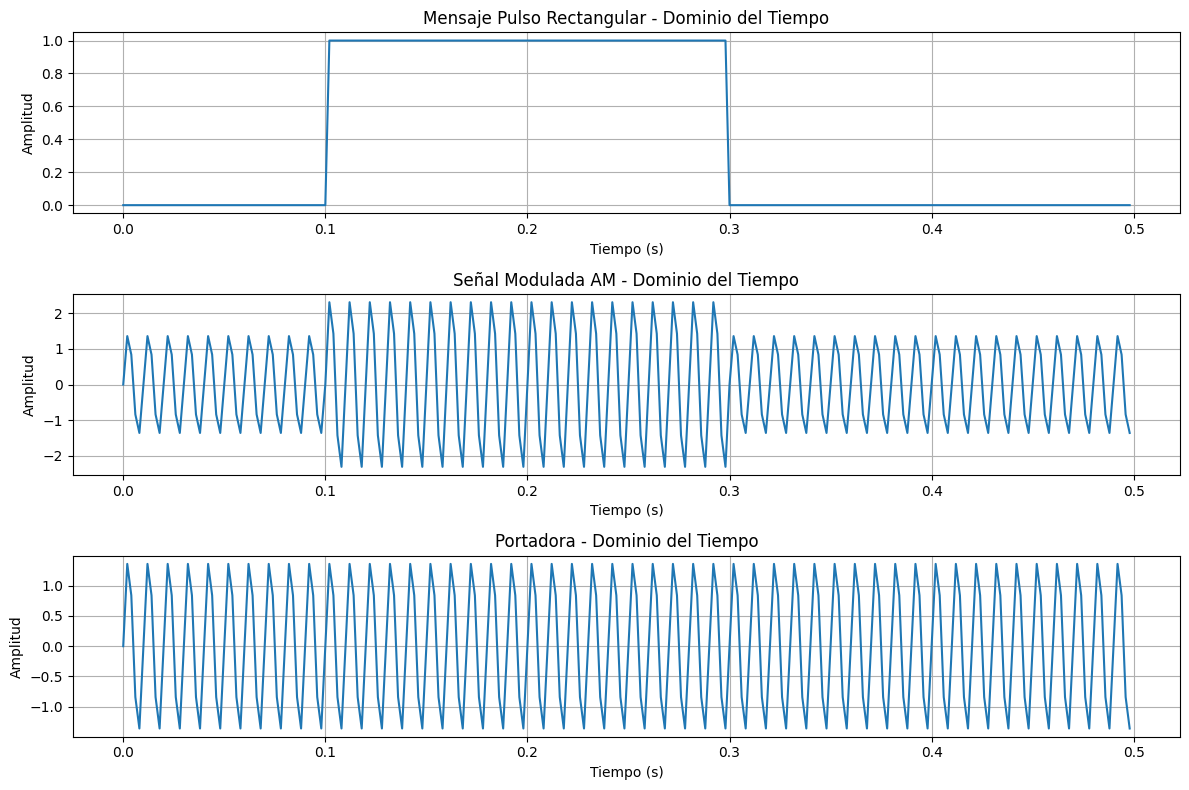

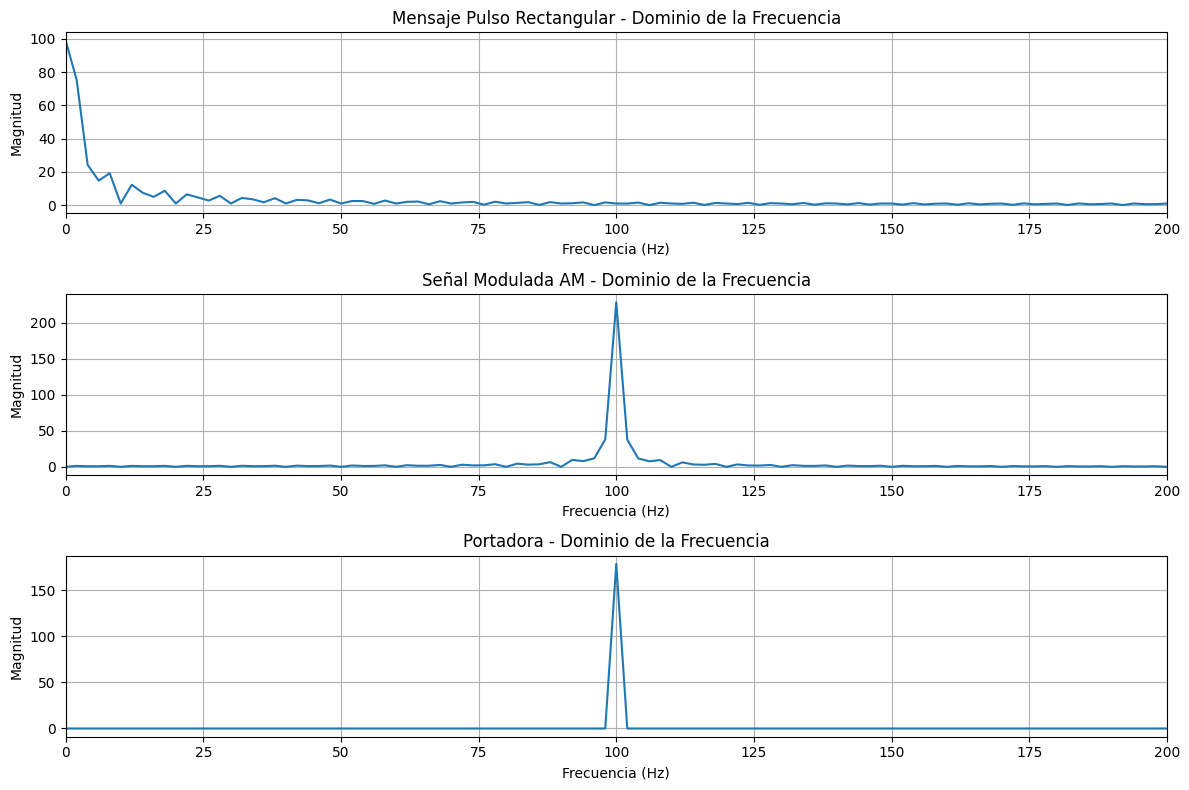


Parámetros utilizados:
Índice de modulación: 0.7
Amplitud portadora (Ac): 1.43
Frecuencia mensaje (Fm): 10 Hz
Frecuencia portadora (Fc): 100 Hz


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros configurables por el usuario
print("=== MODULACIÓN AM - EJEMPLO SIMPLIFICADO ===")
Im = float(input("Índice de modulación (ej: 0.8): ") or "0.8")
tipo_mensaje = input("Tipo de mensaje (coseno/pulso): ") or "coseno"

# Parámetros fijos (como en el cuaderno)
Fc = 100  # Frecuencia portadora
Fm = 10   # Frecuencia del mensaje
Am = 1    # Amplitud del mensaje

# Tiempo de simulación
ti = 0
tf = 5/Fm  # 5 periodos del mensaje
Fs = 5*Fc  # Frecuencia de muestreo
t = np.arange(ti, tf, 1/Fs)

# Generar señal mensaje
if tipo_mensaje == 'coseno':
    m = Am * np.cos(2*np.pi*Fm*t)
    titulo = 'Mensaje Coseno'
else:  # pulso
    m = Am * np.where((t > 0.1) & (t < 0.3), 1, 0)
    titulo = 'Mensaje Pulso Rectangular'

# Calcular amplitud de la portadora según índice de modulación
Ac = np.max(np.abs(m)) / Im

# Generar portadora y señal AM
c = Ac * np.sin(2*np.pi*Fc*t)  # Portadora
s_am = (Ac + m) * np.sin(2*np.pi*Fc*t)  # Señal modulada AM

# Graficar en tiempo
plt.figure(figsize=(12, 8))

# Señal mensaje
plt.subplot(3, 1, 1)
plt.plot(t, m)
plt.title(f'{titulo} - Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal modulada AM
plt.subplot(3, 1, 2)
plt.plot(t, s_am)
plt.title('Señal Modulada AM - Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Portadora
plt.subplot(3, 1, 3)
plt.plot(t, c)
plt.title('Portadora - Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Graficar en frecuencia usando rfft
plt.figure(figsize=(12, 8))

# FFT del mensaje
plt.subplot(3, 1, 1)
f = np.fft.rfftfreq(len(m), 1/Fs)
M_f = np.abs(np.fft.rfft(m))
plt.plot(f, M_f)
plt.title(f'{titulo} - Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 200)

# FFT de la señal AM
plt.subplot(3, 1, 2)
S_am_f = np.abs(np.fft.rfft(s_am))
plt.plot(f, S_am_f)
plt.title('Señal Modulada AM - Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 200)

# FFT de la portadora
plt.subplot(3, 1, 3)
C_f = np.abs(np.fft.rfft(c))
plt.plot(f, C_f)
plt.title('Portadora - Dominio de la Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 200)

plt.tight_layout()
plt.show()

# Mostrar parámetros usados
print(f"\nParámetros utilizados:")
print(f"Índice de modulación: {Im}")
print(f"Amplitud portadora (Ac): {Ac:.2f}")
print(f"Frecuencia mensaje (Fm): {Fm} Hz")
print(f"Frecuencia portadora (Fc): {Fc} Hz")

# 1.6 - MODULACIÓN AM CON TU CANCIÓN FAVORITA

Implementar un sistema de modulación AM (Amplitud Modulada) usando un fragmento de audio
de tu canción favorita de YouTube como señal moduladora.

DESCRIPCIÓN:
1. Descargar un fragmento de audio (segundos 20 a 25) de una canción de YouTube
2. Cargar y procesar la señal de audio
3. Aplicar modulación AM con una portadora de frecuencia adecuada
4. Visualizar las señales en tiempo y frecuencia
5. Reproducir las señales original y modulada

PROCEDIMIENTO:
- Ingresa el enlace de YouTube de tu canción favorita
- El sistema descargará 5 segundos de audio (20s-25s)
- Se aplicará modulación AM con portadora de 10 kHz
- Se analizarán las señales en dominio temporal y frecuencial

In [8]:
!pip install yt-dlp ffmpeg-python

EJERCICIO 1.6 - MODULACIÓN AM CON TU CANCIÓN FAVORITA 
Por favor, ingresa el enlace de YouTube de tu canción favorita:
(Ejemplo: https://www.youtube.com/watch?v=...)
URL de YouTube:https://www.youtube.com/watch?v=OdaIbTUGmHM&list=RDOdaIbTUGmHM&start_radio=1https://www.youtube.com/watch?v=OdaIbTUGmHM&list=RDOdaIbTUGmHM&start_radio=1
Descargando audio de YouTube (segundos 20 a 25)...
[youtube:tab] Extracting URL: https://www.youtube.com/watch?v=OdaIbTUGmHM&list=RDOdaIbTUGmHM&start_radio=1
[youtube:tab] Downloading playlist RDOdaIbTUGmHM - add --no-playlist to download just the video OdaIbTUGmHM
[youtube:tab] RDOdaIbTUGmHM: Downloading webpage
[download] Downloading playlist: Mix - Prince Royce - La Carretera (Official Video)
[youtube:tab] RDOdaIbTUGmHM page 1: Downloading API JSON
[youtube:tab] RDOdaIbTUGmHM page 2: Downloading API JSON
[youtube:tab] RDOdaIbTUGmHM page 3: Downloading API JSON
[youtube:tab] RDOdaIbTUGmHM page 4: Downloading API JSON
[youtube:tab] RDOdaIbTUGmHM page 5: Dow

         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] OdaIbTUGmHM: Downloading m3u8 information
[info] OdaIbTUGmHM: Downloading 1 format(s): 251
[download] Sleeping 4.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.21MiB in 00:00:00 at 28.80MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 2 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=OST41MmjdTQ
[youtube] OST41MmjdTQ: Downloading webpage
[youtube] OST41MmjdTQ: Downloading android sdkless player API JSON
[youtube] OST41MmjdTQ: Downloading tv client config
[youtube] OST41MmjdTQ: Downloading tv player API JSON
[youtube] OST41MmjdTQ: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] OST41MmjdTQ: Downloading m3u8 information
[info] OST41MmjdTQ: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.37MiB in 00:00:00 at 32.48MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 3 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=4B7OGEy3Zgc
[youtube] 4B7OGEy3Zgc: Downloading webpage
[youtube] 4B7OGEy3Zgc: Downloading android sdkless player API JSON
[youtube] 4B7OGEy3Zgc: Downloading tv client config
[youtube] 4B7OGEy3Zgc: Downloading tv player API JSON
[youtube] 4B7OGEy3Zgc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 4B7OGEy3Zgc: Downloading m3u8 information
[info] 4B7OGEy3Zgc: Downloading 1 format(s): 251
[download] Sleeping 4.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.78MiB in 00:00:00 at 22.49MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 4 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=-lDsqOsJL7k
[youtube] -lDsqOsJL7k: Downloading webpage
[youtube] -lDsqOsJL7k: Downloading android sdkless player API JSON
[youtube] -lDsqOsJL7k: Downloading tv client config
[youtube] -lDsqOsJL7k: Downloading tv player API JSON
[youtube] -lDsqOsJL7k: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] -lDsqOsJL7k: Downloading m3u8 information
[info] -lDsqOsJL7k: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.76MiB in 00:00:00 at 32.66MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 5 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=rcNSXsBSWFE
[youtube] rcNSXsBSWFE: Downloading webpage
[youtube] rcNSXsBSWFE: Downloading android sdkless player API JSON
[youtube] rcNSXsBSWFE: Downloading tv client config
[youtube] rcNSXsBSWFE: Downloading tv player API JSON
[youtube] rcNSXsBSWFE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] rcNSXsBSWFE: Downloading m3u8 information
[info] rcNSXsBSWFE: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.91MiB in 00:00:00 at 25.54MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 6 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=XNGWDH-6yv8
[youtube] XNGWDH-6yv8: Downloading webpage
[youtube] XNGWDH-6yv8: Downloading android sdkless player API JSON
[youtube] XNGWDH-6yv8: Downloading tv client config
[youtube] XNGWDH-6yv8: Downloading tv player API JSON
[youtube] XNGWDH-6yv8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] XNGWDH-6yv8: Downloading m3u8 information
[info] XNGWDH-6yv8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.64MiB in 00:00:00 at 26.82MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 7 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Spz1YgguUOM
[youtube] Spz1YgguUOM: Downloading webpage
[youtube] Spz1YgguUOM: Downloading android sdkless player API JSON
[youtube] Spz1YgguUOM: Downloading tv client config
[youtube] Spz1YgguUOM: Downloading tv player API JSON
[youtube] Spz1YgguUOM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Spz1YgguUOM: Downloading m3u8 information
[info] Spz1YgguUOM: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.46MiB in 00:00:00 at 25.62MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 8 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=_VqUoyT1C9U
[youtube] _VqUoyT1C9U: Downloading webpage
[youtube] _VqUoyT1C9U: Downloading android sdkless player API JSON
[youtube] _VqUoyT1C9U: Downloading tv client config
[youtube] _VqUoyT1C9U: Downloading tv player API JSON
[youtube] _VqUoyT1C9U: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] _VqUoyT1C9U: Downloading m3u8 information
[info] _VqUoyT1C9U: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.18MiB in 00:00:00 at 25.27MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 9 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ZDbCCPxwqBI
[youtube] ZDbCCPxwqBI: Downloading webpage
[youtube] ZDbCCPxwqBI: Downloading android sdkless player API JSON
[youtube] ZDbCCPxwqBI: Downloading tv client config
[youtube] ZDbCCPxwqBI: Downloading tv player API JSON
[youtube] ZDbCCPxwqBI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ZDbCCPxwqBI: Downloading m3u8 information
[info] ZDbCCPxwqBI: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.40MiB in 00:00:00 at 26.25MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 10 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=bvLMt1LRASg
[youtube] bvLMt1LRASg: Downloading webpage
[youtube] bvLMt1LRASg: Downloading android sdkless player API JSON
[youtube] bvLMt1LRASg: Downloading tv client config
[youtube] bvLMt1LRASg: Downloading tv player API JSON
[youtube] bvLMt1LRASg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] bvLMt1LRASg: Downloading m3u8 information
[info] bvLMt1LRASg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.95MiB in 00:00:00 at 29.21MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 11 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=elGZbcpGzdU
[youtube] elGZbcpGzdU: Downloading webpage
[youtube] elGZbcpGzdU: Downloading android sdkless player API JSON
[youtube] elGZbcpGzdU: Downloading tv client config
[youtube] elGZbcpGzdU: Downloading tv player API JSON
[youtube] elGZbcpGzdU: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] elGZbcpGzdU: Downloading m3u8 information
[info] elGZbcpGzdU: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.73MiB in 00:00:00 at 24.41MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 12 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=w6wU2pjd_Mw
[youtube] w6wU2pjd_Mw: Downloading webpage
[youtube] w6wU2pjd_Mw: Downloading android sdkless player API JSON
[youtube] w6wU2pjd_Mw: Downloading tv client config
[youtube] w6wU2pjd_Mw: Downloading tv player API JSON
[youtube] w6wU2pjd_Mw: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] w6wU2pjd_Mw: Downloading m3u8 information
[info] w6wU2pjd_Mw: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.82MiB in 00:00:00 at 20.79MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 13 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=dsLjyLn859g
[youtube] dsLjyLn859g: Downloading webpage
[youtube] dsLjyLn859g: Downloading android sdkless player API JSON
[youtube] dsLjyLn859g: Downloading tv client config
[youtube] dsLjyLn859g: Downloading tv player API JSON
[youtube] dsLjyLn859g: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] dsLjyLn859g: Downloading m3u8 information
[info] dsLjyLn859g: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.20MiB in 00:00:00 at 71.18MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 14 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=XEvKn-QgAY0
[youtube] XEvKn-QgAY0: Downloading webpage
[youtube] XEvKn-QgAY0: Downloading android sdkless player API JSON
[youtube] XEvKn-QgAY0: Downloading tv client config
[youtube] XEvKn-QgAY0: Downloading tv player API JSON
[youtube] XEvKn-QgAY0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] XEvKn-QgAY0: Downloading m3u8 information
[info] XEvKn-QgAY0: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.43MiB in 00:00:00 at 24.32MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 15 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=qHnMKnzKwd8
[youtube] qHnMKnzKwd8: Downloading webpage
[youtube] qHnMKnzKwd8: Downloading android sdkless player API JSON
[youtube] qHnMKnzKwd8: Downloading tv client config
[youtube] qHnMKnzKwd8: Downloading tv player API JSON
[youtube] qHnMKnzKwd8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] qHnMKnzKwd8: Downloading m3u8 information
[info] qHnMKnzKwd8: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.38MiB in 00:00:00 at 26.72MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 16 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=eU9NaS0PeAQ
[youtube] eU9NaS0PeAQ: Downloading webpage
[youtube] eU9NaS0PeAQ: Downloading android sdkless player API JSON
[youtube] eU9NaS0PeAQ: Downloading tv client config
[youtube] eU9NaS0PeAQ: Downloading tv player API JSON
[youtube] eU9NaS0PeAQ: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] eU9NaS0PeAQ: Downloading m3u8 information
[info] eU9NaS0PeAQ: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.60MiB in 00:00:00 at 22.15MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 17 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ABjGqQgXRBo
[youtube] ABjGqQgXRBo: Downloading webpage
[youtube] ABjGqQgXRBo: Downloading android sdkless player API JSON
[youtube] ABjGqQgXRBo: Downloading tv client config
[youtube] ABjGqQgXRBo: Downloading tv player API JSON
[youtube] ABjGqQgXRBo: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ABjGqQgXRBo: Downloading m3u8 information
[info] ABjGqQgXRBo: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.06MiB in 00:00:00 at 24.45MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 18 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=QFs3PIZb3js
[youtube] QFs3PIZb3js: Downloading webpage
[youtube] QFs3PIZb3js: Downloading android sdkless player API JSON
[youtube] QFs3PIZb3js: Downloading tv client config
[youtube] QFs3PIZb3js: Downloading tv player API JSON
[youtube] QFs3PIZb3js: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] QFs3PIZb3js: Downloading m3u8 information
[info] QFs3PIZb3js: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.58MiB in 00:00:00 at 28.93MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 19 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=b3ZFwi6vRNk
[youtube] b3ZFwi6vRNk: Downloading webpage
[youtube] b3ZFwi6vRNk: Downloading android sdkless player API JSON
[youtube] b3ZFwi6vRNk: Downloading tv client config
[youtube] b3ZFwi6vRNk: Downloading tv player API JSON
[youtube] b3ZFwi6vRNk: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] b3ZFwi6vRNk: Downloading m3u8 information
[info] b3ZFwi6vRNk: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.51MiB in 00:00:00 at 29.73MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 20 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=jk4HYngf65w
[youtube] jk4HYngf65w: Downloading webpage
[youtube] jk4HYngf65w: Downloading android sdkless player API JSON
[youtube] jk4HYngf65w: Downloading tv client config
[youtube] jk4HYngf65w: Downloading tv player API JSON
[youtube] jk4HYngf65w: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] jk4HYngf65w: Downloading m3u8 information
[info] jk4HYngf65w: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.05MiB in 00:00:00 at 30.21MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 21 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=szPIgrYCxSY
[youtube] szPIgrYCxSY: Downloading webpage
[youtube] szPIgrYCxSY: Downloading android sdkless player API JSON
[youtube] szPIgrYCxSY: Downloading tv client config
[youtube] szPIgrYCxSY: Downloading tv player API JSON
[youtube] szPIgrYCxSY: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] szPIgrYCxSY: Downloading m3u8 information
[info] szPIgrYCxSY: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.69MiB in 00:00:00 at 25.63MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 22 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=R_7K9AwpgCU
[youtube] R_7K9AwpgCU: Downloading webpage
[youtube] R_7K9AwpgCU: Downloading android sdkless player API JSON
[youtube] R_7K9AwpgCU: Downloading tv client config
[youtube] R_7K9AwpgCU: Downloading tv player API JSON
[youtube] R_7K9AwpgCU: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] R_7K9AwpgCU: Downloading m3u8 information
[info] R_7K9AwpgCU: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.27MiB in 00:00:00 at 25.12MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 23 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=KstbkZwnTv0
[youtube] KstbkZwnTv0: Downloading webpage
[youtube] KstbkZwnTv0: Downloading android sdkless player API JSON
[youtube] KstbkZwnTv0: Downloading tv client config
[youtube] KstbkZwnTv0: Downloading tv player API JSON
[youtube] KstbkZwnTv0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] KstbkZwnTv0: Downloading m3u8 information
[info] KstbkZwnTv0: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.21MiB in 00:00:00 at 30.65MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 24 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=yBAx5nBdJqU
[youtube] yBAx5nBdJqU: Downloading webpage
[youtube] yBAx5nBdJqU: Downloading android sdkless player API JSON
[youtube] yBAx5nBdJqU: Downloading tv client config
[youtube] yBAx5nBdJqU: Downloading tv player API JSON
[youtube] yBAx5nBdJqU: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] yBAx5nBdJqU: Downloading m3u8 information
[info] yBAx5nBdJqU: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.09MiB in 00:00:00 at 25.07MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 25 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=EzUYwXNUlkM
[youtube] EzUYwXNUlkM: Downloading webpage
[youtube] EzUYwXNUlkM: Downloading android sdkless player API JSON
[youtube] EzUYwXNUlkM: Downloading tv client config
[youtube] EzUYwXNUlkM: Downloading tv player API JSON
[youtube] EzUYwXNUlkM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] EzUYwXNUlkM: Downloading m3u8 information
[info] EzUYwXNUlkM: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.95MiB in 00:00:00 at 75.46MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 26 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=sD9_l3oDOag
[youtube] sD9_l3oDOag: Downloading webpage
[youtube] sD9_l3oDOag: Downloading android sdkless player API JSON
[youtube] sD9_l3oDOag: Downloading tv client config
[youtube] sD9_l3oDOag: Downloading tv player API JSON
[youtube] sD9_l3oDOag: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] sD9_l3oDOag: Downloading m3u8 information
[info] sD9_l3oDOag: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.71MiB in 00:00:00 at 26.69MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 27 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=xftFxCYQTdk
[youtube] xftFxCYQTdk: Downloading webpage
[youtube] xftFxCYQTdk: Downloading android sdkless player API JSON
[youtube] xftFxCYQTdk: Downloading tv client config
[youtube] xftFxCYQTdk: Downloading tv player API JSON
[youtube] xftFxCYQTdk: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] xftFxCYQTdk: Downloading m3u8 information
[info] xftFxCYQTdk: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.46MiB in 00:00:00 at 26.02MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 28 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=6vMhhBRj-2Q
[youtube] 6vMhhBRj-2Q: Downloading webpage
[youtube] 6vMhhBRj-2Q: Downloading android sdkless player API JSON
[youtube] 6vMhhBRj-2Q: Downloading tv client config
[youtube] 6vMhhBRj-2Q: Downloading tv player API JSON
[youtube] 6vMhhBRj-2Q: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 6vMhhBRj-2Q: Downloading m3u8 information
[info] 6vMhhBRj-2Q: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.52MiB in 00:00:00 at 26.85MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 29 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=4DO8GsIYfhQ
[youtube] 4DO8GsIYfhQ: Downloading webpage
[youtube] 4DO8GsIYfhQ: Downloading android sdkless player API JSON
[youtube] 4DO8GsIYfhQ: Downloading tv client config
[youtube] 4DO8GsIYfhQ: Downloading tv player API JSON
[youtube] 4DO8GsIYfhQ: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 4DO8GsIYfhQ: Downloading m3u8 information
[info] 4DO8GsIYfhQ: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.84MiB in 00:00:00 at 25.21MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 30 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=weGzdKxLzss
[youtube] weGzdKxLzss: Downloading webpage
[youtube] weGzdKxLzss: Downloading android sdkless player API JSON
[youtube] weGzdKxLzss: Downloading tv client config
[youtube] weGzdKxLzss: Downloading tv player API JSON
[youtube] weGzdKxLzss: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] weGzdKxLzss: Downloading m3u8 information
[info] weGzdKxLzss: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.35MiB in 00:00:00 at 23.80MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 31 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=8c7KOGxeY3w
[youtube] 8c7KOGxeY3w: Downloading webpage
[youtube] 8c7KOGxeY3w: Downloading android sdkless player API JSON
[youtube] 8c7KOGxeY3w: Downloading tv client config
[youtube] 8c7KOGxeY3w: Downloading tv player API JSON
[youtube] 8c7KOGxeY3w: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 8c7KOGxeY3w: Downloading m3u8 information
[info] 8c7KOGxeY3w: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.50MiB in 00:00:00 at 26.70MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 32 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=RSyUWjftHrs
[youtube] RSyUWjftHrs: Downloading webpage
[youtube] RSyUWjftHrs: Downloading android sdkless player API JSON
[youtube] RSyUWjftHrs: Downloading tv client config
[youtube] RSyUWjftHrs: Downloading tv player API JSON
[youtube] RSyUWjftHrs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] RSyUWjftHrs: Downloading m3u8 information
[info] RSyUWjftHrs: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.93MiB in 00:00:00 at 30.74MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 33 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=VafbNsrHnD8
[youtube] VafbNsrHnD8: Downloading webpage
[youtube] VafbNsrHnD8: Downloading android sdkless player API JSON
[youtube] VafbNsrHnD8: Downloading tv client config
[youtube] VafbNsrHnD8: Downloading tv player API JSON
[youtube] VafbNsrHnD8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] VafbNsrHnD8: Downloading m3u8 information
[info] VafbNsrHnD8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.01MiB in 00:00:00 at 47.28MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 34 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=0HQInjR1-4o
[youtube] 0HQInjR1-4o: Downloading webpage
[youtube] 0HQInjR1-4o: Downloading android sdkless player API JSON
[youtube] 0HQInjR1-4o: Downloading tv client config
[youtube] 0HQInjR1-4o: Downloading tv player API JSON
[youtube] 0HQInjR1-4o: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 0HQInjR1-4o: Downloading m3u8 information
[info] 0HQInjR1-4o: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.64MiB in 00:00:00 at 20.98MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 35 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=BynMDSpUseE
[youtube] BynMDSpUseE: Downloading webpage
[youtube] BynMDSpUseE: Downloading android sdkless player API JSON
[youtube] BynMDSpUseE: Downloading tv client config
[youtube] BynMDSpUseE: Downloading tv player API JSON
[youtube] BynMDSpUseE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] BynMDSpUseE: Downloading m3u8 information
[info] BynMDSpUseE: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.80MiB in 00:00:00 at 26.92MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 36 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Hz9lhqxl_gQ
[youtube] Hz9lhqxl_gQ: Downloading webpage
[youtube] Hz9lhqxl_gQ: Downloading android sdkless player API JSON
[youtube] Hz9lhqxl_gQ: Downloading tv client config
[youtube] Hz9lhqxl_gQ: Downloading tv player API JSON
[youtube] Hz9lhqxl_gQ: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Hz9lhqxl_gQ: Downloading m3u8 information
[info] Hz9lhqxl_gQ: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    6.04MiB in 00:00:00 at 40.69MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 37 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=R9rVapGCf2c
[youtube] R9rVapGCf2c: Downloading webpage
[youtube] R9rVapGCf2c: Downloading android sdkless player API JSON
[youtube] R9rVapGCf2c: Downloading tv client config
[youtube] R9rVapGCf2c: Downloading tv player API JSON
[youtube] R9rVapGCf2c: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] R9rVapGCf2c: Downloading m3u8 information
[info] R9rVapGCf2c: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.07MiB in 00:00:00 at 29.69MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 38 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Y3XyWhrZnqE
[youtube] Y3XyWhrZnqE: Downloading webpage
[youtube] Y3XyWhrZnqE: Downloading android sdkless player API JSON
[youtube] Y3XyWhrZnqE: Downloading tv client config
[youtube] Y3XyWhrZnqE: Downloading tv player API JSON
[youtube] Y3XyWhrZnqE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Y3XyWhrZnqE: Downloading m3u8 information
[info] Y3XyWhrZnqE: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.32MiB in 00:00:00 at 35.00MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 39 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=TarQP-rtabI
[youtube] TarQP-rtabI: Downloading webpage
[youtube] TarQP-rtabI: Downloading android sdkless player API JSON
[youtube] TarQP-rtabI: Downloading tv client config
[youtube] TarQP-rtabI: Downloading tv player API JSON
[youtube] TarQP-rtabI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] TarQP-rtabI: Downloading m3u8 information
[info] TarQP-rtabI: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.38MiB in 00:00:00 at 22.36MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 40 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=d8QbrpkJLrw
[youtube] d8QbrpkJLrw: Downloading webpage
[youtube] d8QbrpkJLrw: Downloading android sdkless player API JSON
[youtube] d8QbrpkJLrw: Downloading tv client config
[youtube] d8QbrpkJLrw: Downloading tv player API JSON
[youtube] d8QbrpkJLrw: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] d8QbrpkJLrw: Downloading m3u8 information
[info] d8QbrpkJLrw: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.44MiB in 00:00:00 at 19.46MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 41 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=LDJaFUQHi_g
[youtube] LDJaFUQHi_g: Downloading webpage
[youtube] LDJaFUQHi_g: Downloading android sdkless player API JSON
[youtube] LDJaFUQHi_g: Downloading tv client config
[youtube] LDJaFUQHi_g: Downloading tv player API JSON
[youtube] LDJaFUQHi_g: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] LDJaFUQHi_g: Downloading m3u8 information
[info] LDJaFUQHi_g: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.04MiB in 00:00:00 at 28.60MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 42 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=xdG68e_zp8U
[youtube] xdG68e_zp8U: Downloading webpage
[youtube] xdG68e_zp8U: Downloading android sdkless player API JSON
[youtube] xdG68e_zp8U: Downloading tv client config
[youtube] xdG68e_zp8U: Downloading tv player API JSON
[youtube] xdG68e_zp8U: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] xdG68e_zp8U: Downloading m3u8 information
[info] xdG68e_zp8U: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.33MiB in 00:00:00 at 31.17MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 43 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=MkcXU_kn8dw
[youtube] MkcXU_kn8dw: Downloading webpage
[youtube] MkcXU_kn8dw: Downloading android sdkless player API JSON
[youtube] MkcXU_kn8dw: Downloading tv client config
[youtube] MkcXU_kn8dw: Downloading tv player API JSON
[youtube] MkcXU_kn8dw: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] MkcXU_kn8dw: Downloading m3u8 information
[info] MkcXU_kn8dw: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.38MiB in 00:00:00 at 32.94MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 44 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=XlmaJ-yU46U
[youtube] XlmaJ-yU46U: Downloading webpage
[youtube] XlmaJ-yU46U: Downloading android sdkless player API JSON
[youtube] XlmaJ-yU46U: Downloading tv client config
[youtube] XlmaJ-yU46U: Downloading tv player API JSON
[youtube] XlmaJ-yU46U: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] XlmaJ-yU46U: Downloading m3u8 information
[info] XlmaJ-yU46U: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.64MiB in 00:00:00 at 28.95MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 45 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=foyH-TEs9D0
[youtube] foyH-TEs9D0: Downloading webpage
[youtube] foyH-TEs9D0: Downloading android sdkless player API JSON
[youtube] foyH-TEs9D0: Downloading tv client config
[youtube] foyH-TEs9D0: Downloading tv player API JSON
[youtube] foyH-TEs9D0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] foyH-TEs9D0: Downloading m3u8 information
[info] foyH-TEs9D0: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.49MiB in 00:00:00 at 25.94MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 46 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=YEQd_hMkCro
[youtube] YEQd_hMkCro: Downloading webpage
[youtube] YEQd_hMkCro: Downloading android sdkless player API JSON
[youtube] YEQd_hMkCro: Downloading tv client config
[youtube] YEQd_hMkCro: Downloading tv player API JSON
[youtube] YEQd_hMkCro: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] YEQd_hMkCro: Downloading m3u8 information
[info] YEQd_hMkCro: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.41MiB in 00:00:00 at 21.64MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 47 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=3ZcgUPwyhuI
[youtube] 3ZcgUPwyhuI: Downloading webpage
[youtube] 3ZcgUPwyhuI: Downloading android sdkless player API JSON
[youtube] 3ZcgUPwyhuI: Downloading tv client config
[youtube] 3ZcgUPwyhuI: Downloading tv player API JSON
[youtube] 3ZcgUPwyhuI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 3ZcgUPwyhuI: Downloading m3u8 information
[info] 3ZcgUPwyhuI: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.96MiB in 00:00:00 at 31.14MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 48 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=HalzeiAqMCs
[youtube] HalzeiAqMCs: Downloading webpage
[youtube] HalzeiAqMCs: Downloading android sdkless player API JSON
[youtube] HalzeiAqMCs: Downloading tv client config
[youtube] HalzeiAqMCs: Downloading tv player API JSON
[youtube] HalzeiAqMCs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] HalzeiAqMCs: Downloading m3u8 information
[info] HalzeiAqMCs: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.50MiB in 00:00:00 at 21.13MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 49 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=uPCZm2Tvjpo
[youtube] uPCZm2Tvjpo: Downloading webpage
[youtube] uPCZm2Tvjpo: Downloading android sdkless player API JSON
[youtube] uPCZm2Tvjpo: Downloading tv client config
[youtube] uPCZm2Tvjpo: Downloading tv player API JSON
[youtube] uPCZm2Tvjpo: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] uPCZm2Tvjpo: Downloading m3u8 information
[info] uPCZm2Tvjpo: Downloading 1 format(s): 251
[download] Destination: audio_temp.webm
[download] 100% of    5.89MiB in 00:00:00 at 37.08MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 50 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=kADoBrj4934
[youtube] kADoBrj4934: Downloading webpage
[youtube] kADoBrj4934: Downloading android sdkless player API JSON
[youtube] kADoBrj4934: Downloading tv client config
[youtube] kADoBrj4934: Downloading tv player API JSON
[youtube] kADoBrj4934: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] kADoBrj4934: Downloading m3u8 information
[info] kADoBrj4934: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.86MiB in 00:00:00 at 26.11MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 51 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=jEqCWvgnwq0
[youtube] jEqCWvgnwq0: Downloading webpage
[youtube] jEqCWvgnwq0: Downloading android sdkless player API JSON
[youtube] jEqCWvgnwq0: Downloading tv client config
[youtube] jEqCWvgnwq0: Downloading tv player API JSON
[youtube] jEqCWvgnwq0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] jEqCWvgnwq0: Downloading m3u8 information
[info] jEqCWvgnwq0: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.56MiB in 00:00:00 at 30.37MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 52 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Lg_Pn45gyMs
[youtube] Lg_Pn45gyMs: Downloading webpage
[youtube] Lg_Pn45gyMs: Downloading android sdkless player API JSON
[youtube] Lg_Pn45gyMs: Downloading tv client config
[youtube] Lg_Pn45gyMs: Downloading tv player API JSON
[youtube] Lg_Pn45gyMs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Lg_Pn45gyMs: Downloading m3u8 information
[info] Lg_Pn45gyMs: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.38MiB in 00:00:00 at 29.06MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 53 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=tXzg2ZA-9Us
[youtube] tXzg2ZA-9Us: Downloading webpage
[youtube] tXzg2ZA-9Us: Downloading android sdkless player API JSON
[youtube] tXzg2ZA-9Us: Downloading tv client config
[youtube] tXzg2ZA-9Us: Downloading tv player API JSON
[youtube] tXzg2ZA-9Us: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] tXzg2ZA-9Us: Downloading m3u8 information
[info] tXzg2ZA-9Us: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.51MiB in 00:00:00 at 69.78MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 54 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=whBcmlaSLJM
[youtube] whBcmlaSLJM: Downloading webpage
[youtube] whBcmlaSLJM: Downloading android sdkless player API JSON
[youtube] whBcmlaSLJM: Downloading tv client config
[youtube] whBcmlaSLJM: Downloading tv player API JSON
[youtube] whBcmlaSLJM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] whBcmlaSLJM: Downloading m3u8 information
[info] whBcmlaSLJM: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.99MiB in 00:00:00 at 33.48MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 55 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=y7d9VLRO3vc
[youtube] y7d9VLRO3vc: Downloading webpage
[youtube] y7d9VLRO3vc: Downloading android sdkless player API JSON
[youtube] y7d9VLRO3vc: Downloading tv client config
[youtube] y7d9VLRO3vc: Downloading tv player API JSON
[youtube] y7d9VLRO3vc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] y7d9VLRO3vc: Downloading m3u8 information
[info] y7d9VLRO3vc: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.70MiB in 00:00:00 at 22.97MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 56 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=pK060iUFWXg
[youtube] pK060iUFWXg: Downloading webpage
[youtube] pK060iUFWXg: Downloading android sdkless player API JSON
[youtube] pK060iUFWXg: Downloading tv client config
[youtube] pK060iUFWXg: Downloading tv player API JSON
[youtube] pK060iUFWXg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] pK060iUFWXg: Downloading m3u8 information
[info] pK060iUFWXg: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.23MiB in 00:00:00 at 28.93MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 57 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=nZ0zbsZOdwg
[youtube] nZ0zbsZOdwg: Downloading webpage
[youtube] nZ0zbsZOdwg: Downloading android sdkless player API JSON
[youtube] nZ0zbsZOdwg: Downloading tv client config
[youtube] nZ0zbsZOdwg: Downloading tv player API JSON
[youtube] nZ0zbsZOdwg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] nZ0zbsZOdwg: Downloading m3u8 information
[info] nZ0zbsZOdwg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.16MiB in 00:00:00 at 34.08MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 58 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=WtE011iVx1Q
[youtube] WtE011iVx1Q: Downloading webpage
[youtube] WtE011iVx1Q: Downloading android sdkless player API JSON
[youtube] WtE011iVx1Q: Downloading tv client config
[youtube] WtE011iVx1Q: Downloading tv player API JSON
[youtube] WtE011iVx1Q: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] WtE011iVx1Q: Downloading m3u8 information
[info] WtE011iVx1Q: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.00MiB in 00:00:00 at 30.37MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 59 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=uhwU5jwIYO4
[youtube] uhwU5jwIYO4: Downloading webpage
[youtube] uhwU5jwIYO4: Downloading android sdkless player API JSON
[youtube] uhwU5jwIYO4: Downloading tv client config
[youtube] uhwU5jwIYO4: Downloading tv player API JSON
[youtube] uhwU5jwIYO4: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] uhwU5jwIYO4: Downloading m3u8 information
[info] uhwU5jwIYO4: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.35MiB in 00:00:00 at 16.13MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 60 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=aDCcLQto5BM
[youtube] aDCcLQto5BM: Downloading webpage
[youtube] aDCcLQto5BM: Downloading android sdkless player API JSON
[youtube] aDCcLQto5BM: Downloading tv client config
[youtube] aDCcLQto5BM: Downloading tv player API JSON
[youtube] aDCcLQto5BM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] aDCcLQto5BM: Downloading m3u8 information
[info] aDCcLQto5BM: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.33MiB in 00:00:00 at 25.17MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 61 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Mtau4v6foHA
[youtube] Mtau4v6foHA: Downloading webpage
[youtube] Mtau4v6foHA: Downloading android sdkless player API JSON
[youtube] Mtau4v6foHA: Downloading tv client config
[youtube] Mtau4v6foHA: Downloading tv player API JSON
[youtube] Mtau4v6foHA: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Mtau4v6foHA: Downloading m3u8 information
[info] Mtau4v6foHA: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.09MiB in 00:00:00 at 23.31MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 62 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=sDKnKzYyx5c
[youtube] sDKnKzYyx5c: Downloading webpage
[youtube] sDKnKzYyx5c: Downloading android sdkless player API JSON
[youtube] sDKnKzYyx5c: Downloading tv client config
[youtube] sDKnKzYyx5c: Downloading tv player API JSON
[youtube] sDKnKzYyx5c: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] sDKnKzYyx5c: Downloading m3u8 information
[info] sDKnKzYyx5c: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.83MiB in 00:00:00 at 25.01MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 63 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=x2oUajHp8pg
[youtube] x2oUajHp8pg: Downloading webpage
[youtube] x2oUajHp8pg: Downloading android sdkless player API JSON
[youtube] x2oUajHp8pg: Downloading tv client config
[youtube] x2oUajHp8pg: Downloading tv player API JSON
[youtube] x2oUajHp8pg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] x2oUajHp8pg: Downloading m3u8 information
[info] x2oUajHp8pg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.36MiB in 00:00:00 at 25.14MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 64 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=J8U9czVT7tM
[youtube] J8U9czVT7tM: Downloading webpage
[youtube] J8U9czVT7tM: Downloading android sdkless player API JSON
[youtube] J8U9czVT7tM: Downloading tv client config
[youtube] J8U9czVT7tM: Downloading tv player API JSON
[youtube] J8U9czVT7tM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] J8U9czVT7tM: Downloading m3u8 information
[info] J8U9czVT7tM: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.93MiB in 00:00:00 at 26.93MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 65 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=RljdPIfnp0U
[youtube] RljdPIfnp0U: Downloading webpage
[youtube] RljdPIfnp0U: Downloading android sdkless player API JSON
[youtube] RljdPIfnp0U: Downloading tv client config
[youtube] RljdPIfnp0U: Downloading tv player API JSON
[youtube] RljdPIfnp0U: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] RljdPIfnp0U: Downloading m3u8 information
[info] RljdPIfnp0U: Downloading 1 format(s): 251
[download] Sleeping 4.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.78MiB in 00:00:00 at 26.42MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 66 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=uHgbcxMab1I
[youtube] uHgbcxMab1I: Downloading webpage
[youtube] uHgbcxMab1I: Downloading android sdkless player API JSON
[youtube] uHgbcxMab1I: Downloading tv client config
[youtube] uHgbcxMab1I: Downloading tv player API JSON
[youtube] uHgbcxMab1I: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] uHgbcxMab1I: Downloading m3u8 information
[info] uHgbcxMab1I: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.47MiB in 00:00:00 at 21.07MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 67 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=kkx-7fsiWgg
[youtube] kkx-7fsiWgg: Downloading webpage
[youtube] kkx-7fsiWgg: Downloading android sdkless player API JSON
[youtube] kkx-7fsiWgg: Downloading tv client config
[youtube] kkx-7fsiWgg: Downloading tv player API JSON
[youtube] kkx-7fsiWgg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] kkx-7fsiWgg: Downloading m3u8 information
[info] kkx-7fsiWgg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.07MiB in 00:00:00 at 25.79MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 68 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=7jpqqBX-Myw
[youtube] 7jpqqBX-Myw: Downloading webpage
[youtube] 7jpqqBX-Myw: Downloading android sdkless player API JSON
[youtube] 7jpqqBX-Myw: Downloading tv client config
[youtube] 7jpqqBX-Myw: Downloading tv player API JSON
[youtube] 7jpqqBX-Myw: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 7jpqqBX-Myw: Downloading m3u8 information
[info] 7jpqqBX-Myw: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.52MiB in 00:00:00 at 24.83MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 69 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=3X9wEwulYhk
[youtube] 3X9wEwulYhk: Downloading webpage
[youtube] 3X9wEwulYhk: Downloading android sdkless player API JSON
[youtube] 3X9wEwulYhk: Downloading tv client config
[youtube] 3X9wEwulYhk: Downloading tv player API JSON
[youtube] 3X9wEwulYhk: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 3X9wEwulYhk: Downloading m3u8 information
[info] 3X9wEwulYhk: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.32MiB in 00:00:00 at 28.83MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 70 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=_kxz7WX4mLU
[youtube] _kxz7WX4mLU: Downloading webpage
[youtube] _kxz7WX4mLU: Downloading android sdkless player API JSON
[youtube] _kxz7WX4mLU: Downloading tv client config
[youtube] _kxz7WX4mLU: Downloading tv player API JSON
[youtube] _kxz7WX4mLU: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] _kxz7WX4mLU: Downloading m3u8 information
[info] _kxz7WX4mLU: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.66MiB in 00:00:00 at 32.52MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 71 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=JyqD_zfXfi8
[youtube] JyqD_zfXfi8: Downloading webpage
[youtube] JyqD_zfXfi8: Downloading android sdkless player API JSON
[youtube] JyqD_zfXfi8: Downloading tv client config
[youtube] JyqD_zfXfi8: Downloading tv player API JSON
[youtube] JyqD_zfXfi8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] JyqD_zfXfi8: Downloading m3u8 information
[info] JyqD_zfXfi8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.26MiB in 00:00:00 at 32.20MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 72 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=F3uzNaw-uhE
[youtube] F3uzNaw-uhE: Downloading webpage
[youtube] F3uzNaw-uhE: Downloading android sdkless player API JSON
[youtube] F3uzNaw-uhE: Downloading tv client config
[youtube] F3uzNaw-uhE: Downloading tv player API JSON
[youtube] F3uzNaw-uhE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] F3uzNaw-uhE: Downloading m3u8 information
[info] F3uzNaw-uhE: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.43MiB in 00:00:00 at 24.30MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 73 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=mcGBVy3-W4s
[youtube] mcGBVy3-W4s: Downloading webpage
[youtube] mcGBVy3-W4s: Downloading android sdkless player API JSON
[youtube] mcGBVy3-W4s: Downloading tv client config
[youtube] mcGBVy3-W4s: Downloading tv player API JSON
[youtube] mcGBVy3-W4s: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] mcGBVy3-W4s: Downloading m3u8 information
[info] mcGBVy3-W4s: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.92MiB in 00:00:00 at 26.30MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 74 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=9J9FlVCUeLM
[youtube] 9J9FlVCUeLM: Downloading webpage
[youtube] 9J9FlVCUeLM: Downloading android sdkless player API JSON
[youtube] 9J9FlVCUeLM: Downloading tv client config
[youtube] 9J9FlVCUeLM: Downloading tv player API JSON
[youtube] 9J9FlVCUeLM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 9J9FlVCUeLM: Downloading m3u8 information
[info] 9J9FlVCUeLM: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.08MiB in 00:00:00 at 26.02MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 75 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=wfWkmURBNv8
[youtube] wfWkmURBNv8: Downloading webpage
[youtube] wfWkmURBNv8: Downloading android sdkless player API JSON
[youtube] wfWkmURBNv8: Downloading tv client config
[youtube] wfWkmURBNv8: Downloading tv player API JSON
[youtube] wfWkmURBNv8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] wfWkmURBNv8: Downloading m3u8 information
[info] wfWkmURBNv8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.91MiB in 00:00:00 at 31.76MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 76 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=jZGpkLElSu8
[youtube] jZGpkLElSu8: Downloading webpage
[youtube] jZGpkLElSu8: Downloading android sdkless player API JSON
[youtube] jZGpkLElSu8: Downloading tv client config
[youtube] jZGpkLElSu8: Downloading tv player API JSON
[youtube] jZGpkLElSu8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] jZGpkLElSu8: Downloading m3u8 information
[info] jZGpkLElSu8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.49MiB in 00:00:00 at 22.17MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 77 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ooHII67__Sg
[youtube] ooHII67__Sg: Downloading webpage
[youtube] ooHII67__Sg: Downloading android sdkless player API JSON
[youtube] ooHII67__Sg: Downloading tv client config
[youtube] ooHII67__Sg: Downloading tv player API JSON
[youtube] ooHII67__Sg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ooHII67__Sg: Downloading m3u8 information
[info] ooHII67__Sg: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.64MiB in 00:00:00 at 26.31MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 78 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=25vNYV0qdgA
[youtube] 25vNYV0qdgA: Downloading webpage
[youtube] 25vNYV0qdgA: Downloading android sdkless player API JSON
[youtube] 25vNYV0qdgA: Downloading tv client config
[youtube] 25vNYV0qdgA: Downloading tv player API JSON
[youtube] 25vNYV0qdgA: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 25vNYV0qdgA: Downloading m3u8 information
[info] 25vNYV0qdgA: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.47MiB in 00:00:00 at 53.30MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 79 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=w8l33K5D5CI
[youtube] w8l33K5D5CI: Downloading webpage
[youtube] w8l33K5D5CI: Downloading android sdkless player API JSON
[youtube] w8l33K5D5CI: Downloading tv client config
[youtube] w8l33K5D5CI: Downloading tv player API JSON
[youtube] w8l33K5D5CI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] w8l33K5D5CI: Downloading m3u8 information
[info] w8l33K5D5CI: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.64MiB in 00:00:00 at 19.20MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 80 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=1_zgKRBrT0Y
[youtube] 1_zgKRBrT0Y: Downloading webpage
[youtube] 1_zgKRBrT0Y: Downloading android sdkless player API JSON
[youtube] 1_zgKRBrT0Y: Downloading tv client config
[youtube] 1_zgKRBrT0Y: Downloading tv player API JSON
[youtube] 1_zgKRBrT0Y: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 1_zgKRBrT0Y: Downloading m3u8 information
[info] 1_zgKRBrT0Y: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.97MiB in 00:00:00 at 30.71MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 81 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=D-bYv33e6N0
[youtube] D-bYv33e6N0: Downloading webpage
[youtube] D-bYv33e6N0: Downloading android sdkless player API JSON
[youtube] D-bYv33e6N0: Downloading tv client config
[youtube] D-bYv33e6N0: Downloading tv player API JSON
[youtube] D-bYv33e6N0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] D-bYv33e6N0: Downloading m3u8 information
[info] D-bYv33e6N0: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.52MiB in 00:00:00 at 26.70MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 82 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ghAvJMxE1qo
[youtube] ghAvJMxE1qo: Downloading webpage
[youtube] ghAvJMxE1qo: Downloading android sdkless player API JSON
[youtube] ghAvJMxE1qo: Downloading tv client config
[youtube] ghAvJMxE1qo: Downloading tv player API JSON
[youtube] ghAvJMxE1qo: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ghAvJMxE1qo: Downloading m3u8 information
[info] ghAvJMxE1qo: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.36MiB in 00:00:00 at 24.91MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 83 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=byGXHhEF8XE
[youtube] byGXHhEF8XE: Downloading webpage
[youtube] byGXHhEF8XE: Downloading android sdkless player API JSON
[youtube] byGXHhEF8XE: Downloading tv client config
[youtube] byGXHhEF8XE: Downloading tv player API JSON
[youtube] byGXHhEF8XE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] byGXHhEF8XE: Downloading m3u8 information
[info] byGXHhEF8XE: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.54MiB in 00:00:00 at 25.15MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 84 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=0i7-nNOCjiM
[youtube] 0i7-nNOCjiM: Downloading webpage
[youtube] 0i7-nNOCjiM: Downloading android sdkless player API JSON
[youtube] 0i7-nNOCjiM: Downloading tv client config
[youtube] 0i7-nNOCjiM: Downloading tv player API JSON
[youtube] 0i7-nNOCjiM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 0i7-nNOCjiM: Downloading m3u8 information
[info] 0i7-nNOCjiM: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.19MiB in 00:00:00 at 22.13MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 85 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Fk5oL0mgI08
[youtube] Fk5oL0mgI08: Downloading webpage
[youtube] Fk5oL0mgI08: Downloading android sdkless player API JSON
[youtube] Fk5oL0mgI08: Downloading tv client config
[youtube] Fk5oL0mgI08: Downloading tv player API JSON
[youtube] Fk5oL0mgI08: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Fk5oL0mgI08: Downloading m3u8 information
[info] Fk5oL0mgI08: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.09MiB in 00:00:00 at 25.83MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 86 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=jlySoaI0DGI
[youtube] jlySoaI0DGI: Downloading webpage
[youtube] jlySoaI0DGI: Downloading android sdkless player API JSON
[youtube] jlySoaI0DGI: Downloading tv client config
[youtube] jlySoaI0DGI: Downloading tv player API JSON
[youtube] jlySoaI0DGI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] jlySoaI0DGI: Downloading m3u8 information
[info] jlySoaI0DGI: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.06MiB in 00:00:00 at 30.11MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 87 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=D9W4DLjmoOM
[youtube] D9W4DLjmoOM: Downloading webpage
[youtube] D9W4DLjmoOM: Downloading android sdkless player API JSON
[youtube] D9W4DLjmoOM: Downloading tv client config
[youtube] D9W4DLjmoOM: Downloading tv player API JSON
[youtube] D9W4DLjmoOM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] D9W4DLjmoOM: Downloading m3u8 information
[info] D9W4DLjmoOM: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.64MiB in 00:00:00 at 64.73MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 88 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=7m2zyp0vFQc
[youtube] 7m2zyp0vFQc: Downloading webpage
[youtube] 7m2zyp0vFQc: Downloading android sdkless player API JSON
[youtube] 7m2zyp0vFQc: Downloading tv client config
[youtube] 7m2zyp0vFQc: Downloading tv player API JSON
[youtube] 7m2zyp0vFQc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 7m2zyp0vFQc: Downloading m3u8 information
[info] 7m2zyp0vFQc: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.90MiB in 00:00:00 at 29.36MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 89 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=8hRGBcr_gJc
[youtube] 8hRGBcr_gJc: Downloading webpage
[youtube] 8hRGBcr_gJc: Downloading android sdkless player API JSON
[youtube] 8hRGBcr_gJc: Downloading tv client config
[youtube] 8hRGBcr_gJc: Downloading tv player API JSON
[youtube] 8hRGBcr_gJc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 8hRGBcr_gJc: Downloading m3u8 information
[info] 8hRGBcr_gJc: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.72MiB in 00:00:00 at 27.92MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 90 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=uMrN1W4ryoE
[youtube] uMrN1W4ryoE: Downloading webpage
[youtube] uMrN1W4ryoE: Downloading android sdkless player API JSON
[youtube] uMrN1W4ryoE: Downloading tv client config
[youtube] uMrN1W4ryoE: Downloading tv player API JSON
[youtube] uMrN1W4ryoE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] uMrN1W4ryoE: Downloading m3u8 information
[info] uMrN1W4ryoE: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.24MiB in 00:00:00 at 29.00MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 91 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ahhFEODa5AI
[youtube] ahhFEODa5AI: Downloading webpage
[youtube] ahhFEODa5AI: Downloading android sdkless player API JSON
[youtube] ahhFEODa5AI: Downloading tv client config
[youtube] ahhFEODa5AI: Downloading tv player API JSON
[youtube] ahhFEODa5AI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ahhFEODa5AI: Downloading m3u8 information
[info] ahhFEODa5AI: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.02MiB in 00:00:00 at 21.44MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 92 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=nYnLVWXmRm8
[youtube] nYnLVWXmRm8: Downloading webpage
[youtube] nYnLVWXmRm8: Downloading android sdkless player API JSON
[youtube] nYnLVWXmRm8: Downloading tv client config
[youtube] nYnLVWXmRm8: Downloading tv player API JSON
[youtube] nYnLVWXmRm8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] nYnLVWXmRm8: Downloading m3u8 information
[info] nYnLVWXmRm8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.74MiB in 00:00:00 at 54.39MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 93 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=hbhWDNRGciA
[youtube] hbhWDNRGciA: Downloading webpage
[youtube] hbhWDNRGciA: Downloading android sdkless player API JSON
[youtube] hbhWDNRGciA: Downloading tv client config
[youtube] hbhWDNRGciA: Downloading tv player API JSON
[youtube] hbhWDNRGciA: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         n = iemvI6A-n3Ezd8E ; player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] hbhWDNRGciA: Downloading m3u8 information
[info] hbhWDNRGciA: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.62MiB in 00:00:00 at 24.66MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 94 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=EhoLDb6X8JA
[youtube] EhoLDb6X8JA: Downloading webpage
[youtube] EhoLDb6X8JA: Downloading android sdkless player API JSON
[youtube] EhoLDb6X8JA: Downloading tv client config
[youtube] EhoLDb6X8JA: Downloading tv player API JSON
[youtube] EhoLDb6X8JA: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] EhoLDb6X8JA: Downloading m3u8 information
[info] EhoLDb6X8JA: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.79MiB in 00:00:00 at 23.76MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 95 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=QBaIMZ8QjcU
[youtube] QBaIMZ8QjcU: Downloading webpage
[youtube] QBaIMZ8QjcU: Downloading android sdkless player API JSON
[youtube] QBaIMZ8QjcU: Downloading tv client config
[youtube] QBaIMZ8QjcU: Downloading tv player API JSON
[youtube] QBaIMZ8QjcU: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] QBaIMZ8QjcU: Downloading m3u8 information
[info] QBaIMZ8QjcU: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.99MiB in 00:00:00 at 40.32MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 96 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=wZRWpr1G1Qw
[youtube] wZRWpr1G1Qw: Downloading webpage
[youtube] wZRWpr1G1Qw: Downloading android sdkless player API JSON
[youtube] wZRWpr1G1Qw: Downloading tv client config
[youtube] wZRWpr1G1Qw: Downloading tv player API JSON
[youtube] wZRWpr1G1Qw: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] wZRWpr1G1Qw: Downloading m3u8 information
[info] wZRWpr1G1Qw: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.73MiB in 00:00:00 at 26.60MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 97 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=YqJ09Flxt1M
[youtube] YqJ09Flxt1M: Downloading webpage
[youtube] YqJ09Flxt1M: Downloading android sdkless player API JSON
[youtube] YqJ09Flxt1M: Downloading tv client config
[youtube] YqJ09Flxt1M: Downloading tv player API JSON
[youtube] YqJ09Flxt1M: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] YqJ09Flxt1M: Downloading m3u8 information
[info] YqJ09Flxt1M: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.97MiB in 00:00:00 at 30.80MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 98 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=QCZZwZQ4qNs
[youtube] QCZZwZQ4qNs: Downloading webpage
[youtube] QCZZwZQ4qNs: Downloading android sdkless player API JSON
[youtube] QCZZwZQ4qNs: Downloading tv client config
[youtube] QCZZwZQ4qNs: Downloading tv player API JSON
[youtube] QCZZwZQ4qNs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] QCZZwZQ4qNs: Downloading m3u8 information
[info] QCZZwZQ4qNs: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.43MiB in 00:00:00 at 26.33MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 99 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=AMTAQ-AJS4Y
[youtube] AMTAQ-AJS4Y: Downloading webpage
[youtube] AMTAQ-AJS4Y: Downloading android sdkless player API JSON
[youtube] AMTAQ-AJS4Y: Downloading tv client config
[youtube] AMTAQ-AJS4Y: Downloading tv player API JSON
[youtube] AMTAQ-AJS4Y: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] AMTAQ-AJS4Y: Downloading m3u8 information
[info] AMTAQ-AJS4Y: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.74MiB in 00:00:00 at 24.35MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 100 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=hXI8RQYC36Q
[youtube] hXI8RQYC36Q: Downloading webpage
[youtube] hXI8RQYC36Q: Downloading android sdkless player API JSON
[youtube] hXI8RQYC36Q: Downloading tv client config
[youtube] hXI8RQYC36Q: Downloading tv player API JSON
[youtube] hXI8RQYC36Q: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] hXI8RQYC36Q: Downloading m3u8 information
[info] hXI8RQYC36Q: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.83MiB in 00:00:00 at 23.83MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 101 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ex0A-W4XV4A
[youtube] ex0A-W4XV4A: Downloading webpage
[youtube] ex0A-W4XV4A: Downloading android sdkless player API JSON
[youtube] ex0A-W4XV4A: Downloading tv client config
[youtube] ex0A-W4XV4A: Downloading tv player API JSON
[youtube] ex0A-W4XV4A: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ex0A-W4XV4A: Downloading m3u8 information
[info] ex0A-W4XV4A: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.26MiB in 00:00:00 at 23.05MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 102 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=3inw26U-os4
[youtube] 3inw26U-os4: Downloading webpage
[youtube] 3inw26U-os4: Downloading android sdkless player API JSON
[youtube] 3inw26U-os4: Downloading tv client config
[youtube] 3inw26U-os4: Downloading tv player API JSON
[youtube] 3inw26U-os4: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 3inw26U-os4: Downloading m3u8 information
[info] 3inw26U-os4: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.18MiB in 00:00:00 at 23.27MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 103 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=L4RPMSW0Gvc
[youtube] L4RPMSW0Gvc: Downloading webpage
[youtube] L4RPMSW0Gvc: Downloading android sdkless player API JSON
[youtube] L4RPMSW0Gvc: Downloading tv client config
[youtube] L4RPMSW0Gvc: Downloading tv player API JSON
[youtube] L4RPMSW0Gvc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] L4RPMSW0Gvc: Downloading m3u8 information
[info] L4RPMSW0Gvc: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.33MiB in 00:00:00 at 24.34MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 104 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Hx5YuRJrChU
[youtube] Hx5YuRJrChU: Downloading webpage
[youtube] Hx5YuRJrChU: Downloading android sdkless player API JSON
[youtube] Hx5YuRJrChU: Downloading tv client config
[youtube] Hx5YuRJrChU: Downloading tv player API JSON
[youtube] Hx5YuRJrChU: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Hx5YuRJrChU: Downloading m3u8 information
[info] Hx5YuRJrChU: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.14MiB in 00:00:00 at 20.82MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 105 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=fRKg6QNLoYY
[youtube] fRKg6QNLoYY: Downloading webpage
[youtube] fRKg6QNLoYY: Downloading android sdkless player API JSON
[youtube] fRKg6QNLoYY: Downloading tv client config
[youtube] fRKg6QNLoYY: Downloading tv player API JSON
[youtube] fRKg6QNLoYY: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] fRKg6QNLoYY: Downloading m3u8 information
[info] fRKg6QNLoYY: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.76MiB in 00:00:00 at 27.83MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 106 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=B4WGAAAgQmY
[youtube] B4WGAAAgQmY: Downloading webpage
[youtube] B4WGAAAgQmY: Downloading android sdkless player API JSON
[youtube] B4WGAAAgQmY: Downloading tv client config
[youtube] B4WGAAAgQmY: Downloading tv player API JSON
[youtube] B4WGAAAgQmY: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] B4WGAAAgQmY: Downloading m3u8 information
[info] B4WGAAAgQmY: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.21MiB in 00:00:00 at 24.34MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 107 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=YJJbrBEZqy8
[youtube] YJJbrBEZqy8: Downloading webpage
[youtube] YJJbrBEZqy8: Downloading android sdkless player API JSON
[youtube] YJJbrBEZqy8: Downloading tv client config
[youtube] YJJbrBEZqy8: Downloading tv player API JSON
[youtube] YJJbrBEZqy8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] YJJbrBEZqy8: Downloading m3u8 information
[info] YJJbrBEZqy8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.25MiB in 00:00:00 at 27.17MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 108 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=kAKVT1HWNsg
[youtube] kAKVT1HWNsg: Downloading webpage
[youtube] kAKVT1HWNsg: Downloading android sdkless player API JSON
[youtube] kAKVT1HWNsg: Downloading tv client config
[youtube] kAKVT1HWNsg: Downloading tv player API JSON
[youtube] kAKVT1HWNsg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] kAKVT1HWNsg: Downloading m3u8 information
[info] kAKVT1HWNsg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.76MiB in 00:00:00 at 20.13MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 109 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Ubxb1u3izeM
[youtube] Ubxb1u3izeM: Downloading webpage
[youtube] Ubxb1u3izeM: Downloading android sdkless player API JSON
[youtube] Ubxb1u3izeM: Downloading tv client config
[youtube] Ubxb1u3izeM: Downloading tv player API JSON
[youtube] Ubxb1u3izeM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Ubxb1u3izeM: Downloading m3u8 information
[info] Ubxb1u3izeM: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.35MiB in 00:00:00 at 29.77MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 110 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=9MIv5-Q5sP4
[youtube] 9MIv5-Q5sP4: Downloading webpage
[youtube] 9MIv5-Q5sP4: Downloading android sdkless player API JSON
[youtube] 9MIv5-Q5sP4: Downloading tv client config
[youtube] 9MIv5-Q5sP4: Downloading tv player API JSON
[youtube] 9MIv5-Q5sP4: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 9MIv5-Q5sP4: Downloading m3u8 information
[info] 9MIv5-Q5sP4: Downloading 1 format(s): 251
[download] Sleeping 4.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.36MiB in 00:00:00 at 31.56MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 111 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=6vbo0s_JbsA
[youtube] 6vbo0s_JbsA: Downloading webpage
[youtube] 6vbo0s_JbsA: Downloading android sdkless player API JSON
[youtube] 6vbo0s_JbsA: Downloading tv client config
[youtube] 6vbo0s_JbsA: Downloading tv player API JSON
[youtube] 6vbo0s_JbsA: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 6vbo0s_JbsA: Downloading m3u8 information
[info] 6vbo0s_JbsA: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.55MiB in 00:00:00 at 30.80MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 112 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=I9cCPQVPv8o
[youtube] I9cCPQVPv8o: Downloading webpage
[youtube] I9cCPQVPv8o: Downloading android sdkless player API JSON
[youtube] I9cCPQVPv8o: Downloading tv client config
[youtube] I9cCPQVPv8o: Downloading tv player API JSON
[youtube] I9cCPQVPv8o: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] I9cCPQVPv8o: Downloading m3u8 information
[info] I9cCPQVPv8o: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.74MiB in 00:00:00 at 34.75MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 113 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=rtOvBOTyX00
[youtube] rtOvBOTyX00: Downloading webpage
[youtube] rtOvBOTyX00: Downloading android sdkless player API JSON
[youtube] rtOvBOTyX00: Downloading tv client config
[youtube] rtOvBOTyX00: Downloading tv player API JSON
[youtube] rtOvBOTyX00: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] rtOvBOTyX00: Downloading m3u8 information
[info] rtOvBOTyX00: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.67MiB in 00:00:00 at 29.86MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 114 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=dNa5gs24gis
[youtube] dNa5gs24gis: Downloading webpage
[youtube] dNa5gs24gis: Downloading android sdkless player API JSON
[youtube] dNa5gs24gis: Downloading tv client config
[youtube] dNa5gs24gis: Downloading tv player API JSON
[youtube] dNa5gs24gis: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] dNa5gs24gis: Downloading m3u8 information
[info] dNa5gs24gis: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.88MiB in 00:00:00 at 27.86MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 115 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=OYwdXMPu17E
[youtube] OYwdXMPu17E: Downloading webpage
[youtube] OYwdXMPu17E: Downloading android sdkless player API JSON
[youtube] OYwdXMPu17E: Downloading tv client config
[youtube] OYwdXMPu17E: Downloading tv player API JSON
[youtube] OYwdXMPu17E: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] OYwdXMPu17E: Downloading m3u8 information
[info] OYwdXMPu17E: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.15MiB in 00:00:00 at 27.94MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 116 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=-n9krkSb-ug
[youtube] -n9krkSb-ug: Downloading webpage
[youtube] -n9krkSb-ug: Downloading android sdkless player API JSON
[youtube] -n9krkSb-ug: Downloading tv client config
[youtube] -n9krkSb-ug: Downloading tv player API JSON
[youtube] -n9krkSb-ug: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] -n9krkSb-ug: Downloading m3u8 information
[info] -n9krkSb-ug: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.15MiB in 00:00:00 at 28.33MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 117 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=TapXs54Ah3E
[youtube] TapXs54Ah3E: Downloading webpage
[youtube] TapXs54Ah3E: Downloading android sdkless player API JSON
[youtube] TapXs54Ah3E: Downloading tv client config
[youtube] TapXs54Ah3E: Downloading tv player API JSON
[youtube] TapXs54Ah3E: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] TapXs54Ah3E: Downloading m3u8 information
[info] TapXs54Ah3E: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.64MiB in 00:00:00 at 29.04MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 118 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=uQvj5h5owJI
[youtube] uQvj5h5owJI: Downloading webpage
[youtube] uQvj5h5owJI: Downloading android sdkless player API JSON
[youtube] uQvj5h5owJI: Downloading tv client config
[youtube] uQvj5h5owJI: Downloading tv player API JSON
[youtube] uQvj5h5owJI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] uQvj5h5owJI: Downloading m3u8 information
[info] uQvj5h5owJI: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.08MiB in 00:00:00 at 26.50MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 119 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=xFutjZEBTXs
[youtube] xFutjZEBTXs: Downloading webpage
[youtube] xFutjZEBTXs: Downloading android sdkless player API JSON
[youtube] xFutjZEBTXs: Downloading tv client config
[youtube] xFutjZEBTXs: Downloading tv player API JSON
[youtube] xFutjZEBTXs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] xFutjZEBTXs: Downloading m3u8 information
[info] xFutjZEBTXs: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.59MiB in 00:00:00 at 27.43MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 120 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=39Pngb7MAas
[youtube] 39Pngb7MAas: Downloading webpage
[youtube] 39Pngb7MAas: Downloading android sdkless player API JSON
[youtube] 39Pngb7MAas: Downloading tv client config
[youtube] 39Pngb7MAas: Downloading tv player API JSON
[youtube] 39Pngb7MAas: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 39Pngb7MAas: Downloading m3u8 information
[info] 39Pngb7MAas: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.62MiB in 00:00:00 at 22.47MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 121 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=-3To85Lo0TQ
[youtube] -3To85Lo0TQ: Downloading webpage
[youtube] -3To85Lo0TQ: Downloading android sdkless player API JSON
[youtube] -3To85Lo0TQ: Downloading tv client config
[youtube] -3To85Lo0TQ: Downloading tv player API JSON
[youtube] -3To85Lo0TQ: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] -3To85Lo0TQ: Downloading m3u8 information
[info] -3To85Lo0TQ: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.80MiB in 00:00:00 at 27.41MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 122 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=-Pp8dbOUU3Y
[youtube] -Pp8dbOUU3Y: Downloading webpage
[youtube] -Pp8dbOUU3Y: Downloading android sdkless player API JSON
[youtube] -Pp8dbOUU3Y: Downloading tv client config
[youtube] -Pp8dbOUU3Y: Downloading tv player API JSON
[youtube] -Pp8dbOUU3Y: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] -Pp8dbOUU3Y: Downloading m3u8 information
[info] -Pp8dbOUU3Y: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.44MiB in 00:00:00 at 19.90MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 123 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=iyTEPN4rY6c
[youtube] iyTEPN4rY6c: Downloading webpage
[youtube] iyTEPN4rY6c: Downloading android sdkless player API JSON
[youtube] iyTEPN4rY6c: Downloading tv client config
[youtube] iyTEPN4rY6c: Downloading tv player API JSON
[youtube] iyTEPN4rY6c: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] iyTEPN4rY6c: Downloading m3u8 information
[info] iyTEPN4rY6c: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.14MiB in 00:00:00 at 27.87MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 124 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=-5dp4J2jJmg
[youtube] -5dp4J2jJmg: Downloading webpage
[youtube] -5dp4J2jJmg: Downloading android sdkless player API JSON
[youtube] -5dp4J2jJmg: Downloading tv client config
[youtube] -5dp4J2jJmg: Downloading tv player API JSON
[youtube] -5dp4J2jJmg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] -5dp4J2jJmg: Downloading m3u8 information
[info] -5dp4J2jJmg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.98MiB in 00:00:00 at 33.83MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 125 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=0VNcDexqPoY
[youtube] 0VNcDexqPoY: Downloading webpage
[youtube] 0VNcDexqPoY: Downloading android sdkless player API JSON
[youtube] 0VNcDexqPoY: Downloading tv client config
[youtube] 0VNcDexqPoY: Downloading tv player API JSON
[youtube] 0VNcDexqPoY: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 0VNcDexqPoY: Downloading m3u8 information
[info] 0VNcDexqPoY: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.33MiB in 00:00:00 at 33.05MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 126 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=8_QY5gFQUTg
[youtube] 8_QY5gFQUTg: Downloading webpage
[youtube] 8_QY5gFQUTg: Downloading android sdkless player API JSON
[youtube] 8_QY5gFQUTg: Downloading tv client config
[youtube] 8_QY5gFQUTg: Downloading tv player API JSON
[youtube] 8_QY5gFQUTg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 8_QY5gFQUTg: Downloading m3u8 information
[info] 8_QY5gFQUTg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.41MiB in 00:00:00 at 31.38MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 127 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=xA0DBcsfjTE
[youtube] xA0DBcsfjTE: Downloading webpage
[youtube] xA0DBcsfjTE: Downloading android sdkless player API JSON
[youtube] xA0DBcsfjTE: Downloading tv client config
[youtube] xA0DBcsfjTE: Downloading tv player API JSON
[youtube] xA0DBcsfjTE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] xA0DBcsfjTE: Downloading m3u8 information
[info] xA0DBcsfjTE: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.10MiB in 00:00:00 at 26.84MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 128 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=VHcRofjYVB8
[youtube] VHcRofjYVB8: Downloading webpage
[youtube] VHcRofjYVB8: Downloading android sdkless player API JSON
[youtube] VHcRofjYVB8: Downloading tv client config
[youtube] VHcRofjYVB8: Downloading tv player API JSON
[youtube] VHcRofjYVB8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] VHcRofjYVB8: Downloading m3u8 information
[info] VHcRofjYVB8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.94MiB in 00:00:00 at 26.96MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 129 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=9ZX9CRZ-Xr4
[youtube] 9ZX9CRZ-Xr4: Downloading webpage
[youtube] 9ZX9CRZ-Xr4: Downloading android sdkless player API JSON
[youtube] 9ZX9CRZ-Xr4: Downloading tv client config
[youtube] 9ZX9CRZ-Xr4: Downloading tv player API JSON
[youtube] 9ZX9CRZ-Xr4: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 9ZX9CRZ-Xr4: Downloading m3u8 information
[info] 9ZX9CRZ-Xr4: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.33MiB in 00:00:00 at 20.75MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 130 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=4hpzaWUCFAc
[youtube] 4hpzaWUCFAc: Downloading webpage
[youtube] 4hpzaWUCFAc: Downloading android sdkless player API JSON
[youtube] 4hpzaWUCFAc: Downloading tv client config
[youtube] 4hpzaWUCFAc: Downloading tv player API JSON
[youtube] 4hpzaWUCFAc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 4hpzaWUCFAc: Downloading m3u8 information
[info] 4hpzaWUCFAc: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.59MiB in 00:00:00 at 23.16MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 131 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=D6Ju9CyOB-I
[youtube] D6Ju9CyOB-I: Downloading webpage
[youtube] D6Ju9CyOB-I: Downloading android sdkless player API JSON
[youtube] D6Ju9CyOB-I: Downloading tv client config
[youtube] D6Ju9CyOB-I: Downloading tv player API JSON
[youtube] D6Ju9CyOB-I: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] D6Ju9CyOB-I: Downloading m3u8 information
[info] D6Ju9CyOB-I: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.74MiB in 00:00:00 at 19.88MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 132 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=c_lM7xRSUjc
[youtube] c_lM7xRSUjc: Downloading webpage
[youtube] c_lM7xRSUjc: Downloading android sdkless player API JSON
[youtube] c_lM7xRSUjc: Downloading tv client config
[youtube] c_lM7xRSUjc: Downloading tv player API JSON
[youtube] c_lM7xRSUjc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] c_lM7xRSUjc: Downloading m3u8 information
[info] c_lM7xRSUjc: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.02MiB in 00:00:00 at 20.04MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 133 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=TyHvyGVs42U
[youtube] TyHvyGVs42U: Downloading webpage
[youtube] TyHvyGVs42U: Downloading android sdkless player API JSON
[youtube] TyHvyGVs42U: Downloading tv client config
[youtube] TyHvyGVs42U: Downloading tv player API JSON
[youtube] TyHvyGVs42U: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] TyHvyGVs42U: Downloading m3u8 information
[info] TyHvyGVs42U: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.16MiB in 00:00:00 at 17.98MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 134 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=szeA9tvItJY
[youtube] szeA9tvItJY: Downloading webpage
[youtube] szeA9tvItJY: Downloading android sdkless player API JSON
[youtube] szeA9tvItJY: Downloading tv client config
[youtube] szeA9tvItJY: Downloading tv player API JSON
[youtube] szeA9tvItJY: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] szeA9tvItJY: Downloading m3u8 information
[info] szeA9tvItJY: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.40MiB in 00:00:00 at 24.72MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 135 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=gT4IVJRjw4w
[youtube] gT4IVJRjw4w: Downloading webpage
[youtube] gT4IVJRjw4w: Downloading android sdkless player API JSON
[youtube] gT4IVJRjw4w: Downloading tv client config
[youtube] gT4IVJRjw4w: Downloading tv player API JSON
[youtube] gT4IVJRjw4w: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] gT4IVJRjw4w: Downloading m3u8 information
[info] gT4IVJRjw4w: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.57MiB in 00:00:00 at 32.72MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 136 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=VYtJAuoZxcc
[youtube] VYtJAuoZxcc: Downloading webpage
[youtube] VYtJAuoZxcc: Downloading android sdkless player API JSON
[youtube] VYtJAuoZxcc: Downloading tv client config
[youtube] VYtJAuoZxcc: Downloading tv player API JSON
[youtube] VYtJAuoZxcc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] VYtJAuoZxcc: Downloading m3u8 information
[info] VYtJAuoZxcc: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.84MiB in 00:00:00 at 27.13MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 137 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=GmHrjFIWl6U
[youtube] GmHrjFIWl6U: Downloading webpage
[youtube] GmHrjFIWl6U: Downloading android sdkless player API JSON
[youtube] GmHrjFIWl6U: Downloading tv client config
[youtube] GmHrjFIWl6U: Downloading tv player API JSON
[youtube] GmHrjFIWl6U: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] GmHrjFIWl6U: Downloading m3u8 information
[info] GmHrjFIWl6U: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.36MiB in 00:00:00 at 24.95MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 138 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=HL9VoQ-er_U
[youtube] HL9VoQ-er_U: Downloading webpage
[youtube] HL9VoQ-er_U: Downloading android sdkless player API JSON
[youtube] HL9VoQ-er_U: Downloading tv client config
[youtube] HL9VoQ-er_U: Downloading tv player API JSON
[youtube] HL9VoQ-er_U: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] HL9VoQ-er_U: Downloading m3u8 information
[info] HL9VoQ-er_U: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.58MiB in 00:00:00 at 30.90MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 139 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=spbagny8OjM
[youtube] spbagny8OjM: Downloading webpage
[youtube] spbagny8OjM: Downloading android sdkless player API JSON
[youtube] spbagny8OjM: Downloading tv client config
[youtube] spbagny8OjM: Downloading tv player API JSON
[youtube] spbagny8OjM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] spbagny8OjM: Downloading m3u8 information
[info] spbagny8OjM: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.88MiB in 00:00:00 at 19.52MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 140 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ovX1HloCgdA
[youtube] ovX1HloCgdA: Downloading webpage
[youtube] ovX1HloCgdA: Downloading android sdkless player API JSON
[youtube] ovX1HloCgdA: Downloading tv client config
[youtube] ovX1HloCgdA: Downloading tv player API JSON
[youtube] ovX1HloCgdA: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ovX1HloCgdA: Downloading m3u8 information
[info] ovX1HloCgdA: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.34MiB in 00:00:00 at 33.22MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 141 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=atNGFSCjwuc
[youtube] atNGFSCjwuc: Downloading webpage
[youtube] atNGFSCjwuc: Downloading android sdkless player API JSON
[youtube] atNGFSCjwuc: Downloading tv client config
[youtube] atNGFSCjwuc: Downloading tv player API JSON
[youtube] atNGFSCjwuc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] atNGFSCjwuc: Downloading m3u8 information
[info] atNGFSCjwuc: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.00MiB in 00:00:00 at 31.06MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 142 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=iXJyI2tJYgk
[youtube] iXJyI2tJYgk: Downloading webpage
[youtube] iXJyI2tJYgk: Downloading android sdkless player API JSON
[youtube] iXJyI2tJYgk: Downloading tv client config
[youtube] iXJyI2tJYgk: Downloading tv player API JSON
[youtube] iXJyI2tJYgk: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] iXJyI2tJYgk: Downloading m3u8 information
[info] iXJyI2tJYgk: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.05MiB in 00:00:00 at 42.01MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 143 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=BQ6_hjFir70
[youtube] BQ6_hjFir70: Downloading webpage
[youtube] BQ6_hjFir70: Downloading android sdkless player API JSON
[youtube] BQ6_hjFir70: Downloading tv client config
[youtube] BQ6_hjFir70: Downloading tv player API JSON
[youtube] BQ6_hjFir70: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] BQ6_hjFir70: Downloading m3u8 information
[info] BQ6_hjFir70: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.11MiB in 00:00:00 at 21.87MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 144 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=GHLVjriwzFg
[youtube] GHLVjriwzFg: Downloading webpage
[youtube] GHLVjriwzFg: Downloading android sdkless player API JSON
[youtube] GHLVjriwzFg: Downloading tv client config
[youtube] GHLVjriwzFg: Downloading tv player API JSON
[youtube] GHLVjriwzFg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] GHLVjriwzFg: Downloading m3u8 information
[info] GHLVjriwzFg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.79MiB in 00:00:00 at 32.53MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 145 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=JBlTChrXAy4
[youtube] JBlTChrXAy4: Downloading webpage
[youtube] JBlTChrXAy4: Downloading android sdkless player API JSON
[youtube] JBlTChrXAy4: Downloading tv client config
[youtube] JBlTChrXAy4: Downloading tv player API JSON
[youtube] JBlTChrXAy4: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] JBlTChrXAy4: Downloading m3u8 information
[info] JBlTChrXAy4: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.34MiB in 00:00:00 at 22.57MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 146 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=giwEdOQMrPs
[youtube] giwEdOQMrPs: Downloading webpage
[youtube] giwEdOQMrPs: Downloading android sdkless player API JSON
[youtube] giwEdOQMrPs: Downloading tv client config
[youtube] giwEdOQMrPs: Downloading tv player API JSON
[youtube] giwEdOQMrPs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] giwEdOQMrPs: Downloading m3u8 information
[info] giwEdOQMrPs: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.46MiB in 00:00:00 at 23.33MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 147 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=WSsXTzdzmlM
[youtube] WSsXTzdzmlM: Downloading webpage
[youtube] WSsXTzdzmlM: Downloading android sdkless player API JSON
[youtube] WSsXTzdzmlM: Downloading tv client config
[youtube] WSsXTzdzmlM: Downloading tv player API JSON
[youtube] WSsXTzdzmlM: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] WSsXTzdzmlM: Downloading m3u8 information
[info] WSsXTzdzmlM: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.91MiB in 00:00:00 at 73.15MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 148 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=kzZUdnoqyH8
[youtube] kzZUdnoqyH8: Downloading webpage
[youtube] kzZUdnoqyH8: Downloading android sdkless player API JSON
[youtube] kzZUdnoqyH8: Downloading tv client config
[youtube] kzZUdnoqyH8: Downloading tv player API JSON
[youtube] kzZUdnoqyH8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] kzZUdnoqyH8: Downloading m3u8 information
[info] kzZUdnoqyH8: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.88MiB in 00:00:00 at 34.00MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 149 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=cIrHNXEO1zE
[youtube] cIrHNXEO1zE: Downloading webpage
[youtube] cIrHNXEO1zE: Downloading android sdkless player API JSON
[youtube] cIrHNXEO1zE: Downloading tv client config
[youtube] cIrHNXEO1zE: Downloading tv player API JSON
[youtube] cIrHNXEO1zE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] cIrHNXEO1zE: Downloading m3u8 information
[info] cIrHNXEO1zE: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.80MiB in 00:00:00 at 21.64MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 150 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Ujcm2DARD2M
[youtube] Ujcm2DARD2M: Downloading webpage
[youtube] Ujcm2DARD2M: Downloading android sdkless player API JSON
[youtube] Ujcm2DARD2M: Downloading tv client config
[youtube] Ujcm2DARD2M: Downloading tv player API JSON
[youtube] Ujcm2DARD2M: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Ujcm2DARD2M: Downloading m3u8 information
[info] Ujcm2DARD2M: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.49MiB in 00:00:00 at 16.00MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 151 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=r1pHDoFsHXc
[youtube] r1pHDoFsHXc: Downloading webpage
[youtube] r1pHDoFsHXc: Downloading android sdkless player API JSON
[youtube] r1pHDoFsHXc: Downloading tv client config
[youtube] r1pHDoFsHXc: Downloading tv player API JSON
[youtube] r1pHDoFsHXc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] r1pHDoFsHXc: Downloading m3u8 information
[info] r1pHDoFsHXc: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.09MiB in 00:00:00 at 27.78MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 152 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=OK_KvknlJxA
[youtube] OK_KvknlJxA: Downloading webpage
[youtube] OK_KvknlJxA: Downloading android sdkless player API JSON
[youtube] OK_KvknlJxA: Downloading tv client config
[youtube] OK_KvknlJxA: Downloading tv player API JSON
[youtube] OK_KvknlJxA: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] OK_KvknlJxA: Downloading m3u8 information
[info] OK_KvknlJxA: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.02MiB in 00:00:00 at 25.78MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 153 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=adzkF8IftoE
[youtube] adzkF8IftoE: Downloading webpage
[youtube] adzkF8IftoE: Downloading android sdkless player API JSON
[youtube] adzkF8IftoE: Downloading tv client config
[youtube] adzkF8IftoE: Downloading tv player API JSON
[youtube] adzkF8IftoE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] adzkF8IftoE: Downloading m3u8 information
[info] adzkF8IftoE: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.07MiB in 00:00:00 at 21.64MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 154 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=zjpSX6fCPDc
[youtube] zjpSX6fCPDc: Downloading webpage
[youtube] zjpSX6fCPDc: Downloading android sdkless player API JSON
[youtube] zjpSX6fCPDc: Downloading tv client config
[youtube] zjpSX6fCPDc: Downloading tv player API JSON
[youtube] zjpSX6fCPDc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] zjpSX6fCPDc: Downloading m3u8 information
[info] zjpSX6fCPDc: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.68MiB in 00:00:00 at 26.85MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 155 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=snFhcHHdzT0
[youtube] snFhcHHdzT0: Downloading webpage
[youtube] snFhcHHdzT0: Downloading android sdkless player API JSON
[youtube] snFhcHHdzT0: Downloading tv client config
[youtube] snFhcHHdzT0: Downloading tv player API JSON
[youtube] snFhcHHdzT0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] snFhcHHdzT0: Downloading m3u8 information
[info] snFhcHHdzT0: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.84MiB in 00:00:00 at 19.20MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 156 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ik0ZM3xbpBs
[youtube] ik0ZM3xbpBs: Downloading webpage
[youtube] ik0ZM3xbpBs: Downloading android sdkless player API JSON
[youtube] ik0ZM3xbpBs: Downloading tv client config
[youtube] ik0ZM3xbpBs: Downloading tv player API JSON
[youtube] ik0ZM3xbpBs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ik0ZM3xbpBs: Downloading m3u8 information
[info] ik0ZM3xbpBs: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.17MiB in 00:00:00 at 27.56MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 157 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=tu2K3PpIHM8
[youtube] tu2K3PpIHM8: Downloading webpage
[youtube] tu2K3PpIHM8: Downloading android sdkless player API JSON
[youtube] tu2K3PpIHM8: Downloading tv client config
[youtube] tu2K3PpIHM8: Downloading tv player API JSON
[youtube] tu2K3PpIHM8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] tu2K3PpIHM8: Downloading m3u8 information
[info] tu2K3PpIHM8: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.42MiB in 00:00:00 at 21.24MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 158 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=xefetQeVT1g
[youtube] xefetQeVT1g: Downloading webpage
[youtube] xefetQeVT1g: Downloading android sdkless player API JSON
[youtube] xefetQeVT1g: Downloading tv client config
[youtube] xefetQeVT1g: Downloading tv player API JSON
[youtube] xefetQeVT1g: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] xefetQeVT1g: Downloading m3u8 information
[info] xefetQeVT1g: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.18MiB in 00:00:00 at 24.50MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 159 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=HoHhAkEzZRs
[youtube] HoHhAkEzZRs: Downloading webpage
[youtube] HoHhAkEzZRs: Downloading android sdkless player API JSON
[youtube] HoHhAkEzZRs: Downloading tv client config
[youtube] HoHhAkEzZRs: Downloading tv player API JSON
[youtube] HoHhAkEzZRs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] HoHhAkEzZRs: Downloading m3u8 information
[info] HoHhAkEzZRs: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.05MiB in 00:00:00 at 17.73MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 160 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=l2q1qOK31lI
[youtube] l2q1qOK31lI: Downloading webpage
[youtube] l2q1qOK31lI: Downloading android sdkless player API JSON
[youtube] l2q1qOK31lI: Downloading tv client config
[youtube] l2q1qOK31lI: Downloading tv player API JSON
[youtube] l2q1qOK31lI: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] l2q1qOK31lI: Downloading m3u8 information
[info] l2q1qOK31lI: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.64MiB in 00:00:00 at 26.56MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 161 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=WllxyZpvVEs
[youtube] WllxyZpvVEs: Downloading webpage
[youtube] WllxyZpvVEs: Downloading android sdkless player API JSON
[youtube] WllxyZpvVEs: Downloading tv client config
[youtube] WllxyZpvVEs: Downloading tv player API JSON
[youtube] WllxyZpvVEs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] WllxyZpvVEs: Downloading m3u8 information
[info] WllxyZpvVEs: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.99MiB in 00:00:00 at 31.27MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 162 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=mG0b8IAJvts
[youtube] mG0b8IAJvts: Downloading webpage
[youtube] mG0b8IAJvts: Downloading android sdkless player API JSON
[youtube] mG0b8IAJvts: Downloading tv client config
[youtube] mG0b8IAJvts: Downloading tv player API JSON
[youtube] mG0b8IAJvts: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] mG0b8IAJvts: Downloading m3u8 information
[info] mG0b8IAJvts: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.68MiB in 00:00:01 at 4.52MiB/s   
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 163 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=rD6eqdNx6Gc
[youtube] rD6eqdNx6Gc: Downloading webpage
[youtube] rD6eqdNx6Gc: Downloading android sdkless player API JSON
[youtube] rD6eqdNx6Gc: Downloading tv client config
[youtube] rD6eqdNx6Gc: Downloading tv player API JSON
[youtube] rD6eqdNx6Gc: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] rD6eqdNx6Gc: Downloading m3u8 information
[info] rD6eqdNx6Gc: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.74MiB in 00:00:00 at 21.92MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 164 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=ILz5iFrE424
[youtube] ILz5iFrE424: Downloading webpage
[youtube] ILz5iFrE424: Downloading android sdkless player API JSON
[youtube] ILz5iFrE424: Downloading tv client config
[youtube] ILz5iFrE424: Downloading tv player API JSON
[youtube] ILz5iFrE424: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] ILz5iFrE424: Downloading m3u8 information
[info] ILz5iFrE424: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.14MiB in 00:00:00 at 20.46MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 165 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=LKItaoNC35Y
[youtube] LKItaoNC35Y: Downloading webpage
[youtube] LKItaoNC35Y: Downloading android sdkless player API JSON
[youtube] LKItaoNC35Y: Downloading tv client config
[youtube] LKItaoNC35Y: Downloading tv player API JSON
[youtube] LKItaoNC35Y: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] LKItaoNC35Y: Downloading m3u8 information
[info] LKItaoNC35Y: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.26MiB in 00:00:00 at 20.21MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 166 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=SepaNo0USWQ
[youtube] SepaNo0USWQ: Downloading webpage
[youtube] SepaNo0USWQ: Downloading android sdkless player API JSON
[youtube] SepaNo0USWQ: Downloading tv client config
[youtube] SepaNo0USWQ: Downloading tv player API JSON
[youtube] SepaNo0USWQ: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] SepaNo0USWQ: Downloading m3u8 information
[info] SepaNo0USWQ: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.00MiB in 00:00:00 at 16.10MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 167 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=fQVgYwOnV-Y
[youtube] fQVgYwOnV-Y: Downloading webpage
[youtube] fQVgYwOnV-Y: Downloading android sdkless player API JSON
[youtube] fQVgYwOnV-Y: Downloading tv client config
[youtube] fQVgYwOnV-Y: Downloading tv player API JSON
[youtube] fQVgYwOnV-Y: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] fQVgYwOnV-Y: Downloading m3u8 information
[info] fQVgYwOnV-Y: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.54MiB in 00:00:00 at 22.17MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 168 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=brWvSzmf7cQ
[youtube] brWvSzmf7cQ: Downloading webpage
[youtube] brWvSzmf7cQ: Downloading android sdkless player API JSON
[youtube] brWvSzmf7cQ: Downloading tv client config
[youtube] brWvSzmf7cQ: Downloading tv player API JSON
[youtube] brWvSzmf7cQ: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] brWvSzmf7cQ: Downloading m3u8 information
[info] brWvSzmf7cQ: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    2.83MiB in 00:00:00 at 16.38MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 169 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=giWlJZo1NO0
[youtube] giWlJZo1NO0: Downloading webpage
[youtube] giWlJZo1NO0: Downloading android sdkless player API JSON
[youtube] giWlJZo1NO0: Downloading tv client config
[youtube] giWlJZo1NO0: Downloading tv player API JSON
[youtube] giWlJZo1NO0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] giWlJZo1NO0: Downloading m3u8 information
[info] giWlJZo1NO0: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.88MiB in 00:00:00 at 15.68MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 170 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=kE1-O0tU-UU
[youtube] kE1-O0tU-UU: Downloading webpage
[youtube] kE1-O0tU-UU: Downloading android sdkless player API JSON
[youtube] kE1-O0tU-UU: Downloading tv client config
[youtube] kE1-O0tU-UU: Downloading tv player API JSON
[youtube] kE1-O0tU-UU: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] kE1-O0tU-UU: Downloading m3u8 information
[info] kE1-O0tU-UU: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.50MiB in 00:00:00 at 25.82MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 171 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=TVesgEZGKLs
[youtube] TVesgEZGKLs: Downloading webpage
[youtube] TVesgEZGKLs: Downloading android sdkless player API JSON
[youtube] TVesgEZGKLs: Downloading tv client config
[youtube] TVesgEZGKLs: Downloading tv player API JSON
[youtube] TVesgEZGKLs: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] TVesgEZGKLs: Downloading m3u8 information
[info] TVesgEZGKLs: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.78MiB in 00:00:00 at 31.28MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 172 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=9kbFdKX1rJw
[youtube] 9kbFdKX1rJw: Downloading webpage
[youtube] 9kbFdKX1rJw: Downloading android sdkless player API JSON
[youtube] 9kbFdKX1rJw: Downloading tv client config
[youtube] 9kbFdKX1rJw: Downloading tv player API JSON
[youtube] 9kbFdKX1rJw: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] 9kbFdKX1rJw: Downloading m3u8 information
[info] 9kbFdKX1rJw: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.76MiB in 00:00:00 at 25.78MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 173 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=y8UWBPLnlm0
[youtube] y8UWBPLnlm0: Downloading webpage
[youtube] y8UWBPLnlm0: Downloading android sdkless player API JSON
[youtube] y8UWBPLnlm0: Downloading tv client config
[youtube] y8UWBPLnlm0: Downloading tv player API JSON
[youtube] y8UWBPLnlm0: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] y8UWBPLnlm0: Downloading m3u8 information
[info] y8UWBPLnlm0: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.71MiB in 00:00:00 at 21.79MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 174 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=j1ttXHDfh-Y
[youtube] j1ttXHDfh-Y: Downloading webpage
[youtube] j1ttXHDfh-Y: Downloading android sdkless player API JSON
[youtube] j1ttXHDfh-Y: Downloading tv client config
[youtube] j1ttXHDfh-Y: Downloading tv player API JSON
[youtube] j1ttXHDfh-Y: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] j1ttXHDfh-Y: Downloading m3u8 information
[info] j1ttXHDfh-Y: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.59MiB in 00:00:00 at 21.63MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 175 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=TqqJlMa5P-E
[youtube] TqqJlMa5P-E: Downloading webpage
[youtube] TqqJlMa5P-E: Downloading android sdkless player API JSON
[youtube] TqqJlMa5P-E: Downloading tv client config
[youtube] TqqJlMa5P-E: Downloading tv player API JSON
[youtube] TqqJlMa5P-E: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] TqqJlMa5P-E: Downloading m3u8 information
[info] TqqJlMa5P-E: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.89MiB in 00:00:00 at 21.01MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 176 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=MB23TtaeiQY
[youtube] MB23TtaeiQY: Downloading webpage
[youtube] MB23TtaeiQY: Downloading android sdkless player API JSON
[youtube] MB23TtaeiQY: Downloading tv client config
[youtube] MB23TtaeiQY: Downloading tv player API JSON
[youtube] MB23TtaeiQY: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] MB23TtaeiQY: Downloading m3u8 information
[info] MB23TtaeiQY: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.63MiB in 00:00:00 at 24.23MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 177 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=fY36BMNDqbg
[youtube] fY36BMNDqbg: Downloading webpage
[youtube] fY36BMNDqbg: Downloading android sdkless player API JSON
[youtube] fY36BMNDqbg: Downloading tv client config
[youtube] fY36BMNDqbg: Downloading tv player API JSON
[youtube] fY36BMNDqbg: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] fY36BMNDqbg: Downloading m3u8 information
[info] fY36BMNDqbg: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.38MiB in 00:00:00 at 21.80MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 178 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=hPT2FGoSOr8
[youtube] hPT2FGoSOr8: Downloading webpage
[youtube] hPT2FGoSOr8: Downloading android sdkless player API JSON
[youtube] hPT2FGoSOr8: Downloading tv client config
[youtube] hPT2FGoSOr8: Downloading tv player API JSON
[youtube] hPT2FGoSOr8: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] hPT2FGoSOr8: Downloading m3u8 information
[info] hPT2FGoSOr8: Downloading 1 format(s): 251
[download] Sleeping 6.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    5.95MiB in 00:00:00 at 35.24MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 179 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=Oe1fRwgGu5E
[youtube] Oe1fRwgGu5E: Downloading webpage
[youtube] Oe1fRwgGu5E: Downloading android sdkless player API JSON
[youtube] Oe1fRwgGu5E: Downloading tv client config
[youtube] Oe1fRwgGu5E: Downloading tv player API JSON
[youtube] Oe1fRwgGu5E: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] Oe1fRwgGu5E: Downloading m3u8 information
[info] Oe1fRwgGu5E: Downloading 1 format(s): 251
[download] Sleeping 5.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    3.53MiB in 00:00:00 at 25.03MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 180 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=lRWqYR3e7xE
[youtube] lRWqYR3e7xE: Downloading webpage
[youtube] lRWqYR3e7xE: Downloading android sdkless player API JSON
[youtube] lRWqYR3e7xE: Downloading tv client config
[youtube] lRWqYR3e7xE: Downloading tv player API JSON
[youtube] lRWqYR3e7xE: Downloading web safari player API JSON


         player = https://www.youtube.com/s/player/65578ad1/player_ias.vflset/en_US/base.js
         Please report this issue on  https://github.com/yt-dlp/yt-dlp/issues?q= , filling out the appropriate issue template. Confirm you are on the latest version using  yt-dlp -U


[youtube] lRWqYR3e7xE: Downloading m3u8 information
[info] lRWqYR3e7xE: Downloading 1 format(s): 251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: audio_temp.webm
[download] 100% of    4.51MiB in 00:00:00 at 29.07MiB/s  
[ExtractAudio] Destination: audio_temp.wav
Deleting original file audio_temp.webm (pass -k to keep)
[download] Downloading item 181 of 287
[youtube] Extracting URL: https://www.youtube.com/watch?v=VMp55KH_3wo
[youtube] VMp55KH_3wo: Downloading webpage
[youtube] VMp55KH_3wo: Downloading android sdkless player API JSON
[youtube] VMp55KH_3wo: Downloading tv client config
[youtube] VMp55KH_3wo: Downloading tv player API JSON
[youtube] VMp55KH_3wo: Downloading web safari player API JSON


ERROR: [youtube] VMp55KH_3wo: Sign in to confirm you’re not a bot. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies


 Error descargando audio: ERROR: [youtube] VMp55KH_3wo: Sign in to confirm you’re not a bot. Use --cookies-from-browser or --cookies for the authentication. See  https://github.com/yt-dlp/yt-dlp/wiki/FAQ#how-do-i-pass-cookies-to-yt-dlp  for how to manually pass cookies. Also see  https://github.com/yt-dlp/yt-dlp/wiki/Extractors#exporting-youtube-cookies  for tips on effectively exporting YouTube cookies
Generando señal de ejemplo...

🎵 Procesando: Señal de Ejemplo (Música Sintética)
📊 Parámetros: Fs=44100Hz, 220500 muestras

MODULACIÓN AM


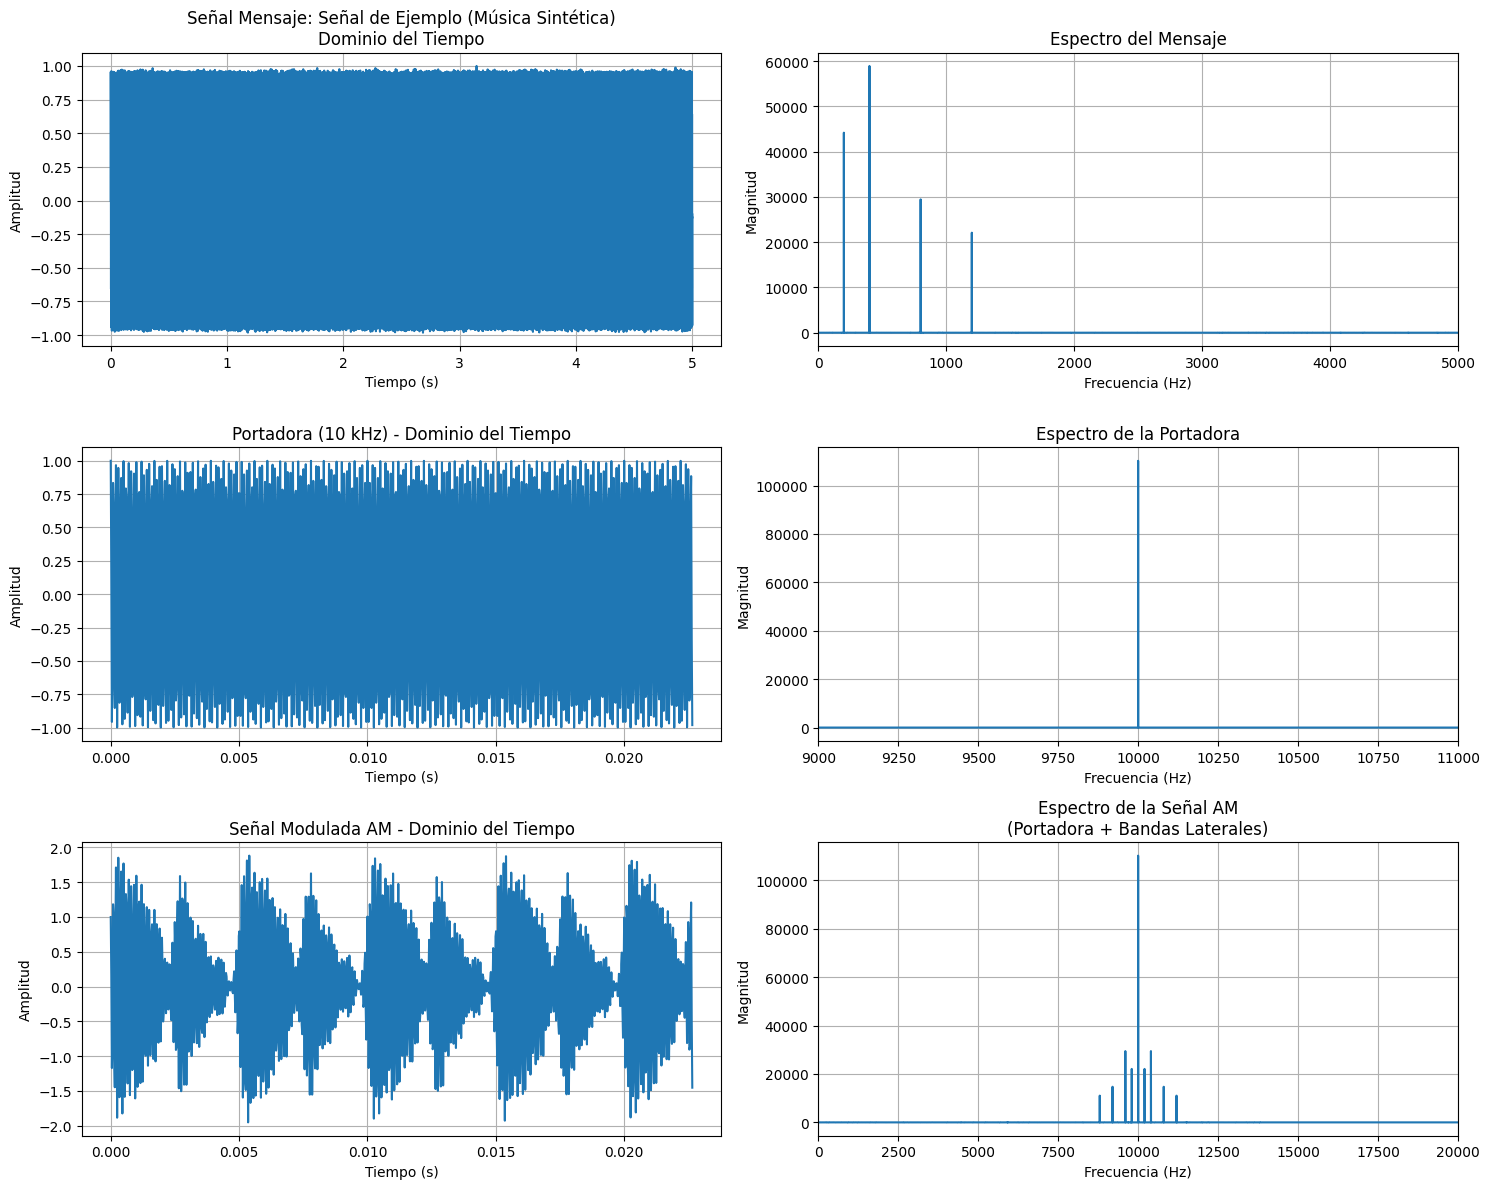


REPRODUCCIÓN DE AUDIOS
🎵 Reproduciendo señal mensaje (audio original)...


📻 Reproduciendo señal modulada AM...



DEMODULACIÓN COHERENTE


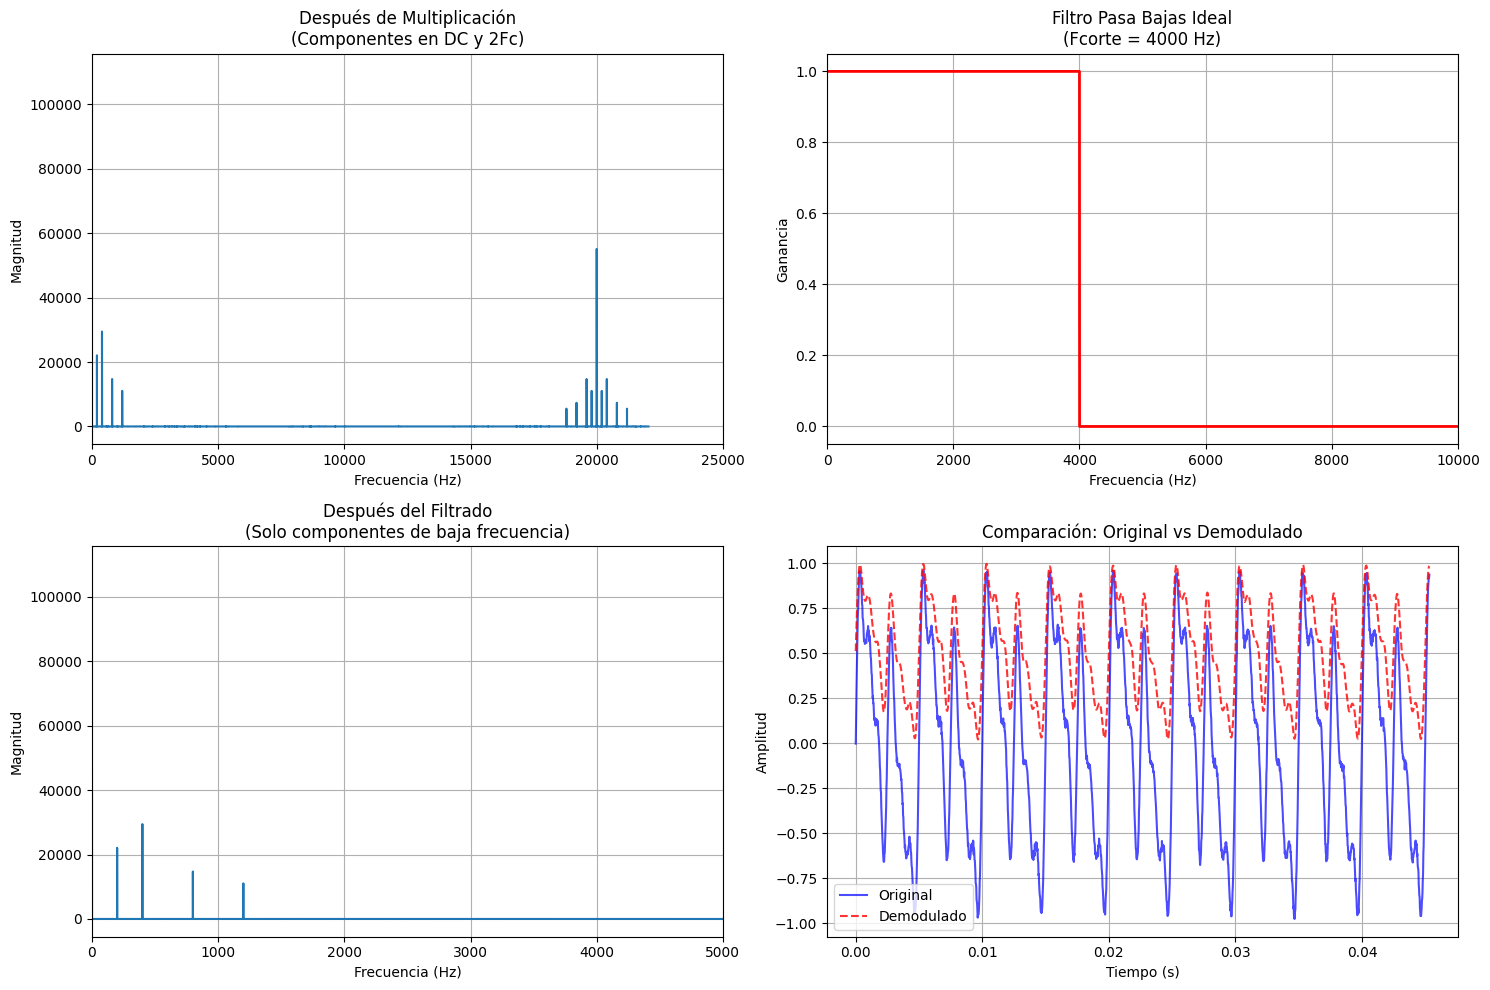


REPRODUCCIÓN SEÑALES DEMODULADAS
🔊 Reproduciendo señal después de multiplicación...


🎶 Reproduciendo señal demodulada final...



ANÁLISIS DE CALIDAD
Error promedio: 0.5086
Coeficiente de correlación: 0.9997
❌ Demodulación con DISTORSIÓN significativa

RESUMEN TEÓRICO

ESPECTRO DE LA SEÑAL AM:
Y(f) = 0.5·Ac[δ(f-Fc) + δ(f+Fc)] + 0.5[M(f-Fc) + M(f+Fc)]

• Componentes: Portadora en ±Fc + Bandas Laterales
• Ancho de banda: 2×Fmax_mensaje

DEMODULADOR COHERENTE (θ₀ = 0):
1. y(t)·c(t) = [1 + m(t)]·cos²(2πFct)
2. cos²(x) = 0.5[1 + cos(2x)] ⇒ 0.5[1 + m(t)] + 0.5[1 + m(t)]cos(4πFct)
3. Filtrado pasa bajas elimina componente en 2Fc
4. Resultado: m(t) recuperado (con componente DC removida)


🎯 Parámetros utilizados:
• Índice de modulación: 1.0
• Frecuencia portadora: 10000 Hz
• Frecuencia de muestreo: 44100 Hz
• Duración del segmento: 5.00 s


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy import signal
import IPython.display as ipd
import yt_dlp
import io

# 1.6 Aplicación en comunicaciones - modulación AM con tu canción favorita

print("EJERCICIO 1.6 - MODULACIÓN AM CON TU CANCIÓN FAVORITA ")

# Solicitar enlace de YouTube
print("Por favor, ingresa el enlace de YouTube de tu canción favorita:")
print("(Ejemplo: https://www.youtube.com/watch?v=...)")
url_youtube = input("URL de YouTube:https://www.youtube.com/watch?v=OdaIbTUGmHM&list=RDOdaIbTUGmHM&start_radio=1")

# Parámetros de modulación
Fc = 10000  # Frecuencia portadora (10 kHz)
Ac = 1.0    # Amplitud portadora
Im = 1.0    # Índice de modulación

def descargar_audio_youtube(url, inicio=20, duracion=5):
    """Descarga 5 segundos de audio desde YouTube"""
    print(f"Descargando audio de YouTube (segundos {inicio} a {inicio+duracion})...")

    # Configuración de yt-dlp
    ydl_opts = {
        'format': 'bestaudio/best',
        'outtmpl': 'audio_temp.%(ext)s',
        'postprocessors': [{
            'key': 'FFmpegExtractAudio',
            'preferredcodec': 'wav',
        }],
    }

    try:
        with yt_dlp.YoutubeDL(ydl_opts) as ydl:
            info = ydl.extract_info(url, download=True)
            print(f"✓ Audio descargado: {info['title']}")

        # Leer el archivo WAV descargado
        Fs_audio, audio_data = wav.read('audio_temp.wav')

        # Convertir a mono si es estéreo y normalizar
        if len(audio_data.shape) > 1:
            audio_data = audio_data.mean(axis=1)

        # Extraer segmento de 5 segundos (del segundo 20 al 25)
        inicio_muestras = inicio * Fs_audio
        fin_muestras = (inicio + duracion) * Fs_audio

        if fin_muestras > len(audio_data):
            print("⚠ El audio es más corto de lo esperado, ajustando...")
            fin_muestras = len(audio_data)
            duracion = (fin_muestras - inicio_muestras) / Fs_audio

        m_audio = audio_data[inicio_muestras:fin_muestras]
        m_audio = m_audio.astype(np.float32)
        m_audio = m_audio / np.max(np.abs(m_audio))

        print(f"✓ Segmento extraído: {duracion:.2f} segundos a {Fs_audio} Hz")
        return Fs_audio, m_audio, info['title']

    except Exception as e:
        print(f" Error descargando audio: {e}")
        print("Generando señal de ejemplo...")
        return generar_señal_ejemplo()

def generar_señal_ejemplo():
    """Genera señal de ejemplo si falla la descarga"""
    Fs_audio = 44100
    duracion = 5
    t_audio = np.linspace(0, duracion, Fs_audio * duracion, endpoint=False)

    # Señal más compleja que simula música
    f1, f2, f3, f4 = 200, 400, 800, 1200
    m_audio = (0.6 * np.sin(2*np.pi*f1*t_audio) +
               0.8 * np.sin(2*np.pi*f2*t_audio) +
               0.4 * np.sin(2*np.pi*f3*t_audio) +
               0.3 * np.sin(2*np.pi*f4*t_audio) +
               0.2 * np.random.normal(0, 0.1, len(t_audio)))

    m_audio = m_audio / np.max(np.abs(m_audio))
    return Fs_audio, m_audio, "Señal de Ejemplo (Música Sintética)"

# Descargar o generar audio
Fs_audio, m_audio, titulo_cancion = descargar_audio_youtube(url_youtube)
t_audio = np.linspace(0, len(m_audio)/Fs_audio, len(m_audio), endpoint=False)

print(f"\n🎵 Procesando: {titulo_cancion}")
print(f"📊 Parámetros: Fs={Fs_audio}Hz, {len(m_audio)} muestras")

# MODULACIÓN AM
print("\n" + "="*50)
print("MODULACIÓN AM")
print("="*50)

# Señal portadora
c = Ac * np.cos(2*np.pi*Fc*t_audio)

# Señal modulada AM: y(t) = (1 + m(t)/Ac) * c(t)
y_am = (1 + (m_audio/Ac) * Im) * c

# Graficar señales en tiempo y frecuencia
plt.figure(figsize=(15, 12))

# Señal mensaje (audio) - tiempo
plt.subplot(3, 2, 1)
plt.plot(t_audio, m_audio)
plt.title(f'Señal Mensaje: {titulo_cancion}\nDominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal mensaje - frecuencia
plt.subplot(3, 2, 2)
M_f = np.abs(np.fft.rfft(m_audio))
f_m = np.fft.rfftfreq(len(m_audio), 1/Fs_audio)
plt.plot(f_m, M_f)
plt.title('Espectro del Mensaje')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 5000)

# Portadora - tiempo
plt.subplot(3, 2, 3)
muestras_vis = min(1000, len(c))  # Para mejor visualización
plt.plot(t_audio[:muestras_vis], c[:muestras_vis])
plt.title(f'Portadora ({Fc/1000:.0f} kHz) - Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Portadora - frecuencia
plt.subplot(3, 2, 4)
C_f = np.abs(np.fft.rfft(c))
f_c = np.fft.rfftfreq(len(c), 1/Fs_audio)
plt.plot(f_c, C_f)
plt.title('Espectro de la Portadora')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(Fc-1000, Fc+1000)

# Señal AM - tiempo
plt.subplot(3, 2, 5)
plt.plot(t_audio[:muestras_vis], y_am[:muestras_vis])
plt.title('Señal Modulada AM - Dominio del Tiempo')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)

# Señal AM - frecuencia
plt.subplot(3, 2, 6)
Y_f = np.abs(np.fft.rfft(y_am))
f_y = np.fft.rfftfreq(len(y_am), 1/Fs_audio)
plt.plot(f_y, Y_f)
plt.title('Espectro de la Señal AM\n(Portadora + Bandas Laterales)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 20000)

plt.tight_layout()
plt.show()

# REPRODUCCIÓN DE AUDIOS
print("\n" + "="*50)
print("REPRODUCCIÓN DE AUDIOS")
print("="*50)

print("🎵 Reproduciendo señal mensaje (audio original)...")
audio_msg = np.int16(m_audio * 32767)
ipd.display(ipd.Audio(audio_msg, rate=Fs_audio))

print("📻 Reproduciendo señal modulada AM...")
audio_am = np.int16(y_am * 32767 / np.max(np.abs(y_am)))
ipd.display(ipd.Audio(audio_am, rate=Fs_audio))

# DEMODULACIÓN COHERENTE
print("\n" + "="*50)
print("DEMODULACIÓN COHERENTE")
print("="*50)

# Etapa 1: Multiplicación por portadora coherente (θ₀ = 0)
y_demod = y_am * c

# Etapa 2: Filtrado pasa bajas ideal (usando FFT)
Y_demod_f = np.fft.rfft(y_demod)
freqs = np.fft.rfftfreq(len(y_demod), 1/Fs_audio)

# Filtro ideal pasa bajas (corte en 4 kHz)
frec_corte = 4000
filtro = np.zeros_like(freqs)
filtro[freqs <= frec_corte] = 1

# Aplicar filtro
Y_filtrado_f = Y_demod_f * filtro
y_filtrado = np.fft.irfft(Y_filtrado_f)

# Normalizar señal demodulada
y_final = y_filtrado / np.max(np.abs(y_filtrado))

# Graficar etapas del demodulador
plt.figure(figsize=(15, 10))

# Después de multiplicación - frecuencia
plt.subplot(2, 2, 1)
Y_demod_f_plot = np.abs(Y_demod_f)
plt.plot(freqs, Y_demod_f_plot)
plt.title('Después de Multiplicación\n(Componentes en DC y 2Fc)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 25000)

# Filtro ideal
plt.subplot(2, 2, 2)
plt.plot(freqs, filtro, 'r-', linewidth=2)
plt.title(f'Filtro Pasa Bajas Ideal\n(Fcorte = {frec_corte} Hz)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Ganancia')
plt.grid(True)
plt.xlim(0, 10000)

# Señal filtrada - frecuencia
plt.subplot(2, 2, 3)
Y_filtrado_f_plot = np.abs(Y_filtrado_f)
plt.plot(freqs, Y_filtrado_f_plot)
plt.title('Después del Filtrado\n(Solo componentes de baja frecuencia)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.grid(True)
plt.xlim(0, 5000)

# Comparación original vs demodulado - tiempo
plt.subplot(2, 2, 4)
plt.plot(t_audio[:2000], m_audio[:2000], 'b-', alpha=0.7, label='Original')
plt.plot(t_audio[:2000], y_final[:2000], 'r--', alpha=0.8, label='Demodulado')
plt.title('Comparación: Original vs Demodulado')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# REPRODUCCIÓN SEÑALES DEMODULADAS
print("\n" + "="*50)
print("REPRODUCCIÓN SEÑALES DEMODULADAS")
print("="*50)

print("🔊 Reproduciendo señal después de multiplicación...")
audio_demod = np.int16(y_demod * 32767 / np.max(np.abs(y_demod)))
ipd.display(ipd.Audio(audio_demod, rate=Fs_audio))

print("🎶 Reproduciendo señal demodulada final...")
audio_final = np.int16(y_final * 32767)
ipd.display(ipd.Audio(audio_final, rate=Fs_audio))

# ANÁLISIS DE CALIDAD
print("\n" + "="*50)
print("ANÁLISIS DE CALIDAD")
print("="*50)

error = np.mean(np.abs(m_audio - y_final))
similitud = np.corrcoef(m_audio, y_final)[0,1]

print(f"Error promedio: {error:.4f}")
print(f"Coeficiente de correlación: {similitud:.4f}")

if error < 0.1 and similitud > 0.8:
    print("✅ Demodulación EXITOSA - Alta calidad")
elif error < 0.2 and similitud > 0.6:
    print("⚠️  Demodulación ACEPTABLE - Alguna distorsión")
else:
    print("❌ Demodulación con DISTORSIÓN significativa")

# RESUMEN TEÓRICO
print("\n" + "="*50)
print("RESUMEN TEÓRICO")
print("="*50)

print("""
ESPECTRO DE LA SEÑAL AM:
Y(f) = 0.5·Ac[δ(f-Fc) + δ(f+Fc)] + 0.5[M(f-Fc) + M(f+Fc)]

• Componentes: Portadora en ±Fc + Bandas Laterales
• Ancho de banda: 2×Fmax_mensaje

DEMODULADOR COHERENTE (θ₀ = 0):
1. y(t)·c(t) = [1 + m(t)]·cos²(2πFct)
2. cos²(x) = 0.5[1 + cos(2x)] ⇒ 0.5[1 + m(t)] + 0.5[1 + m(t)]cos(4πFct)
3. Filtrado pasa bajas elimina componente en 2Fc
4. Resultado: m(t) recuperado (con componente DC removida)
""")

print(f"\n🎯 Parámetros utilizados:")
print(f"• Índice de modulación: {Im}")
print(f"• Frecuencia portadora: {Fc} Hz")
print(f"• Frecuencia de muestreo: {Fs_audio} Hz")
print(f"• Duración del segmento: {len(m_audio)/Fs_audio:.2f} s")

# 1.7 Aplicación en circuitos eléctricos – Potencia, THD y factor de potencia

En este punto quiero analizar la **distorsión total de armónicos (THD)** y la**distorsión del factor de potencia** a partir de la FFT, usando como ejemplo un **rectificador de onda completa** con dos tipos de carga:

1. Carga netamente **resistiva** (R pura).
2. Carga **RC en serie**, tomando la tensión de salida en el capacitor, tal como se hace en el cuaderno `3_Rectificador_RC_THD`.

---

#### ¿Qué es la distorsión total de armónicos (THD)?

Cuando una señal no es un seno “perfecto”, aparece energía en
armónicos (múltiplos de la frecuencia fundamental).  
La **THD** mide qué tanto pesan esos armónicos frente al fundamental:

$[
THD = \frac{\sqrt{V_2^2 + V_3^2 + \cdots + V_n^2}}{V_1}
$]

- $(V_1$): valor RMS del **armónico fundamental**.
- $(V_n$): valor RMS del armónico $(n$)-ésimo.

Si la señal fuera totalmente senoidal, todos los armónicos serían cero y el
THD sería 0. A medida que la forma de onda se deforma, el THD aumenta.

---

#### ¿Qué es el factor de potencia y cómo entra el THD?

El **factor de potencia** total se puede descomponer en:

$[
PF = PF_\text{desfase} \cdot PF_\text{distorsión}
$]

- $(PF_\text{desfase} = \cos\varphi$): asociado al desfase entre tensión y corriente.
- $(PF_\text{distorsión}$): asociado a la **distorsión armónica**.

Cuando solo quiero ver el efecto de la distorsión debida al THD, se usa:

$[
PF_\text{distorsión} = PF_{THD} = \sqrt{\frac{1}{1 + THD^2}}
$]

Es decir, **a mayor THD, menor factor de potencia asociado a la distorsión**.

---

#### ¿Cómo obtengo el THD desde la FFT?

1. Tomo la señal de salida $(v(t)$).
2. Calculo la **FFT** para obtener el espectro $(V(f)$).
3. Identifico la frecuencia del **armónico fundamental** $(f_1$) y su magnitud $(V_1$).
4. Tomo varias componentes armónicas $(V_2, V_3, \dots, V_n$) (múltiplos enteros de $(f_1$)).
5. Aplico directamente la fórmula del THD:

$[
THD = \frac{\sqrt{V_2^2 + V_3^2 + \cdots + V_n^2}}{V_1}
$]

En este trabajo uso una onda de 60 Hz rectificada de onda completa, de modo que
el **armónico fundamental de la señal rectificada** queda a $(2\cdot 60 = 120\ \text{Hz}$).

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# ==========================
# Funciones auxiliares
# ==========================

def onda_rectificada_completa(t, A, Fo):
    """
    Genera una onda senoidal de amplitud A y frecuencia Fo,
    rectificada de onda completa.
    """
    return A * np.abs(np.sin(2 * np.pi * Fo * t))

def calcular_fft(x, Fs):
    """
    Calcula FFT de una señal x(t) muestreada a Fs.
    Retorna frecuencias y magnitud normalizada.
    """
    N = len(x)
    X = np.fft.rfft(x)
    freqs = np.fft.rfftfreq(N, 1 / Fs)
    mag = np.abs(X) / N   # normalizada; la escala no afecta el THD
    return freqs, mag

def calcular_thd(x, Fs, Ffund, n_harm=15):
    """
    Calcula el THD a partir de la FFT de la señal x(t).
    Ffund es la frecuencia del armónico fundamental de la señal rectificada.
    """
    freqs, mag = calcular_fft(x, Fs)

    # Índice del fundamental
    idx_f1 = np.argmin(np.abs(freqs - Ffund))
    V1 = mag[idx_f1]

    suma = 0.0
    for k in range(2, n_harm + 1):
        fk = k * Ffund
        if fk > Fs / 2:
            break
        idx_fk = np.argmin(np.abs(freqs - fk))
        suma += mag[idx_fk]**2

    THD = np.sqrt(suma) / V1
    return THD, freqs, mag

def factor_potencia_distorsion(THD):
    """
    Factor de potencia asociado a la distorsión armónica:
    PF_THD = 1 / sqrt(1 + THD^2)
    """
    return 1 / np.sqrt(1 + THD**2)

In [15]:
# ==========================
# Parámetros de simulación
# ==========================

Fo = 60             # frecuencia de alimentación (Hz)
Fs = 30 * Fo        # frecuencia de muestreo (tomada del cuaderno: 30*Fo)
To = 1 / Fo         # periodo fundamental de red
Ts = 1 / Fs         # periodo de muestreo
t = np.arange(0, 5 * To, Ts)  # simulo 5 periodos
A = 120             # amplitud de la señal de entrada

# Para la señal rectificada, el fundamental de la onda rectificada está en 2*Fo
Ffund_rect = 2 * Fo


THD carga RC (R = 1000 Ω, C = 10 µF): 0.273 (27.3 %)
Factor de potencia por distorsión carga RC: 0.965


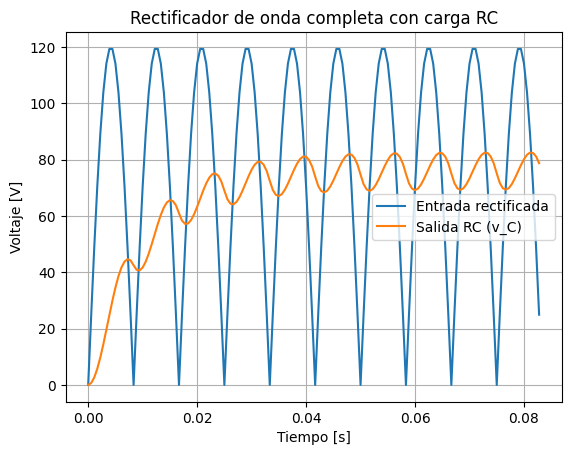

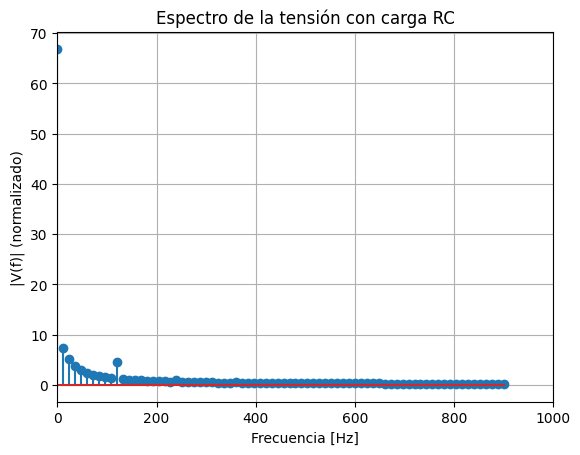

In [16]:
# ==========================
# Función para simular el rectificador RC (serie)
# ==========================

def salida_rectificador_RC(R, C, Fo=60, A=120, n_periodos=5, Fs_factor=30):
    """
    Simula el circuito rectificador de onda completa con carga RC en serie,
    usando la función de transferencia G(s) = 1 / (RCs + 1).
    La salida es el voltaje en el capacitor.
    """
    Fo = Fo
    Fs = Fs_factor * Fo
    To = 1 / Fo
    Ts = 1 / Fs
    t = np.arange(0, n_periodos * To, Ts)

    # Entrada: onda rectificada completa
    vin = onda_rectificada_completa(t, A, Fo)

    # Función de transferencia (como en el cuaderno)
    num = np.array([1.0])
    den = np.array([R * C, 1.0])
    sistema = sig.TransferFunction(num, den)

    # Respuesta del sistema ante la entrada rectificada
    tout, vout, _ = sig.lsim(sistema, U=vin, T=t)

    return t, vin, vout, Fs

# ==========================
# Simulación para un valor base de R y C
# ==========================

R_v = 1000        # Ohmios
C_v = 10e-6       # Faradios

t_rc, vin_rc, vout_rc, Fs_rc = salida_rectificador_RC(R_v, C_v, Fo=Fo, A=A)

# THD y factor de potencia por distorsión para este caso
THD_RC, freqs_RC, mag_RC = calcular_thd(vout_rc, Fs_rc, Ffund=Ffund_rect)
PF_THD_RC = factor_potencia_distorsion(THD_RC)

print(f"THD carga RC (R = {R_v} Ω, C = {C_v*1e6:.0f} µF): {THD_RC:.3f} ({THD_RC*100:.1f} %)")
print(f"Factor de potencia por distorsión carga RC: {PF_THD_RC:.3f}")

# Gráfica comparando entrada rectificada y salida del RC
plt.plot(t_rc, vin_rc, label='Entrada rectificada')
plt.plot(t_rc, vout_rc, label='Salida RC (v_C)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Voltaje [V]')
plt.title('Rectificador de onda completa con carga RC')
plt.legend()
plt.grid(True)
plt.show()

# Espectro de la salida RC (corregido)
plt.stem(freqs_RC, mag_RC)
plt.xlim(0, 1000)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|V(f)| (normalizado)')
plt.title('Espectro de la tensión con carga RC')
plt.grid(True)
plt.show()

In [17]:
import pandas as pd

valores_R = [500, 1000, 2000]                 # Ohmios
valores_C = [10e-6, 47e-6, 100e-6]           # Faradios

resultados = []

for R in valores_R:
    for C in valores_C:
        t_rc, vin_rc, vout_rc, Fs_rc = salida_rectificador_RC(R, C, Fo=Fo, A=A)
        THD_RC, _, _ = calcular_thd(vout_rc, Fs_rc, Ffund=Ffund_rect)
        PF_THD_RC = factor_potencia_distorsion(THD_RC)
        resultados.append((R, C, THD_RC, PF_THD_RC))

tabla_resultados = pd.DataFrame(resultados, columns=['R [Ω]', 'C [F]', 'THD', 'PF_THD'])
tabla_resultados


,R [Ω],C [F],THD,PF_THD
0,500,0.000010,0.199825,0.980614
1,500,0.000047,0.401555,0.927978
2,500,0.000100,0.500734,0.894165
3,1000,0.000010,0.273365,0.964608
4,1000,0.000047,0.494213,0.896493
5,1000,0.000100,0.554433,0.874574
6,2000,0.000010,0.376420,0.935892
7,2000,0.000047,0.550906,0.875881
8,2000,0.000100,0.582210,0.864201


# Discusión de los resultados

A partir de las simulaciones obtuve:

- Para la **carga resistiva pura**, la señal de salida es la onda
  senoidal rectificada completa. Esta forma de onda tiene un contenido
  armónico moderado, con un THD alrededor de un 25 % y un
  factor de potencia por distorsión cercano a 0.97.  
  En otras palabras, la señal ya no es senoidal perfecta, pero la distorsión
  todavía no es extrema.

- Para la **carga RC en serie**, usando el modelo del cuaderno
  `3_Rectificador_RC_THD` (función de transferencia $(G(s)=1/(RCs+1)$)),
  la tensión en el capacitor se filtra y la forma de onda se hace más
  “plana” (más parecida a un valor medio con rizado). Al analizar el
  espectro, se observa que cambia la distribución de armónicos y el THD
  ya no es igual al caso resistivo.

- Al variar **R** y **C** se ve que el THD y el factor de potencia por
  distorsión $(PF_{THD}$) cambian:
  - Con ciertos valores de $(R$) y un **C pequeño**, el filtro es poco
    efectivo y la forma de onda se parece más a la rectificada original.
    El THD se mantiene cercano al del caso resistivo.
  - A medida que aumento la constante de tiempo $(RC$), la forma de
    onda de salida se hace más “cargada” hacia un valor casi constante
    con rizado, lo que modifica la relación entre el fundamental y los
    armónicos. Esto se refleja en cambios en el THD y en una ligera
    reducción del $(PF_{THD}$).

Podemos ocncluir de manera más tecnica:

- El **THD** se puede calcular de forma directa usando la **FFT** de la
  señal, identificando el armónico fundamental y sumando la energía de
  los armónicos superiores.
- A partir de ese THD, la **distorsión del factor de potencia** se puede
  estimar con:
  $[
  PF_{THD} = \sqrt{\frac{1}{1 + THD^2}}
  $]
- El rectificador de onda completa introduce armónicos importantes, y
  la forma de la carga (R pura o RC) modifica el contenido armónico de la
  tensión de salida y, por tanto, la calidad de la señal y el factor de
  potencia asociado a la distorsión.


# 1.8 — Aplicación en circuitos eléctricos y comunicaciones (Dashboard Streamlit)

**Enunciado:**  
Utilizando la herramienta **Streamlit**, genere un **dashboard interactivo** que contenga los siguientes módulos:

1. **Aplicación en comunicaciones – Modulación AM**  
   - Implemente la generación de una señal de **modulación en amplitud (AM – DSB-LC)**.  
   - Permita ajustar la frecuencia de la portadora, la frecuencia de mensaje, el índice de modulación y las amplitudes.  
   - Visualice la señal en el dominio del tiempo y su **espectro** (mediante la FFT).  
   - Analice cómo varía el espectro al modificar el índice de modulación.

2. **Aplicación en circuitos eléctricos – Potencia**  
   - Analice un **rectificador de onda completa** con dos tipos de carga:  
     i) **netamente resistiva**, y  
     ii) **una carga RC en serie**.  
   - Investigue en qué consiste la **Distorsión Total Armónica (THD, Total Harmonic Distortion)** y el **factor de potencia (PF)** en un circuito eléctrico.  
   - Muestre cómo puede calcularse el **THD** a partir de la **FFT** de la señal de salida.  
   - Calcule la **distorsión del factor de potencia** a partir del THD usando la relación:
     $[
     PF_{THD} = \frac{1}{\sqrt{1 + THD^2}}
     $]
   - Genere un ejemplo ilustrativo que permita variar los valores de **R** y **C**, observando el efecto sobre el THD y el PF.  
   - Incluya las condiciones de simulación y discuta los resultados obtenidos.

In [18]:
# ==== CREA LA ESTRUCTURA Y LOS ARCHIVOS DEL PROYECTO ====
import os
base = "/content/streamlit_multiapp"
apps = f"{base}/apps"
os.makedirs(apps, exist_ok=True)

# -------------------------
# requirements.txt
# -------------------------
open(f"{base}/requirements.txt","w").write("""streamlit==1.39.0
numpy
scipy
matplotlib
pandas
""")

# -------------------------
# multiapp.py
# -------------------------
open(f"{base}/multiapp.py","w").write("""# Patrón MultiApp usado en el DEMO: contenedor de sub-aplicaciones Streamlit
# (idéntica idea al cuaderno Demo_MultiApp_NoNgrok.ipynb)
import streamlit as st

class MultiApp:
    def __init__(self):
        self.apps = []

    def add_app(self, title, func):
        # Registro de páginas/módulos
        self.apps.append({"title": title, "function": func})

    def run(self):
        # Navegación desde la barra lateral (como en el demo)
        st.sidebar.title("🧭 Navegación")
        app = st.sidebar.radio("Selecciona un módulo", self.apps, format_func=lambda a: a["title"])
        app["function"]()
""")

# -------------------------
# app.py  (lanzador principal)
# -------------------------
open(f"{base}/app.py","w").write("""# Lanzador principal (igual al demo): registra páginas y ejecuta la MultiApp
# Este archivo sigue la estructura del Demo_MultiApp_NoNgrok.ipynb
import streamlit as st
from multiapp import MultiApp
from apps import am_modulation, power_thd

st.set_page_config(page_title="Demo MultiApp (Colab, sin ngrok)", layout="wide")

st.title("📊 MultiApp: Señales y Sistemas (Colab)")
st.markdown(\"\"\"Este panel es una **MultiApp** hecha con **Streamlit** siguiendo el patrón del cuaderno
`Demo_MultiApp_NoNgrok.ipynb`. Se incluyen dos módulos:

1) **Comunicaciones – Modulación AM (DSB-LC)**
2) **Circuitos – Potencia/THD (rectificador R y RC)**

> La navegación entre módulos se hace desde la **barra lateral** (igual que en el demo).
\"\"\")

app = MultiApp()
app.add_app("Comunicaciones: Modulación AM", am_modulation.app)
app.add_app("Circuitos: Potencia y THD", power_thd.app)
app.run()
""")

# -------------------------
# apps/am_modulation.py
# -------------------------
open(f"{apps}/am_modulation.py","w").write(r"""# Página 1 — Comunicaciones: Modulación AM (DSB-LC)
# Basada en el patrón del Demo_MultiApp_NoNgrok (estructura MultiApp + navegación lateral)
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt

def am_signal(Ac, Am, fc, fm, m, t):
    # Señal del mensaje, portadora y AM DSB-LC
    mc = Am * np.cos(2*np.pi*fm*t)
    carrier = Ac * np.cos(2*np.pi*fc*t)
    s = (1 + m*np.cos(2*np.pi*fm*t)) * Ac * np.cos(2*np.pi*fc*t)
    return mc, carrier, s

def spectrum(x, Fs):
    # FFT con ventana de Hanning (mejora visual; no cambia la definición)
    N = len(x)
    X = np.fft.rfft(x * np.hanning(N))
    f = np.fft.rfftfreq(N, 1/Fs)
    mag = np.abs(X)/N
    return f, mag

def app():
    st.header("📡 Aplicación en Comunicaciones — Modulación AM (DSB-LC)")
    st.caption("Basado en la estructura del demo `Demo_MultiApp_NoNgrok.ipynb` (MultiApp sin ngrok en Colab).")

    with st.expander("Resumen rápido (editable)", expanded=False):
        st.markdown(
            "- $s(t)=A_c\\,[1+m\\cos(2\\pi f_m t)]\\cos(2\\pi f_c t)$  \n"
            "- Índice de modulación ideal: $0\\le m\\le1$.  \n"
            "- En frecuencia aparecen $f_c$ y bandas laterales $f_c\\pm f_m$."
        )

    col1, col2 = st.columns(2)
    with col1:
        Fs = st.number_input("Frecuencia de registro [Hz]", min_value=10000, value=100000, step=5000)
        dur = st.slider("Duración [ms]", 10, 200, 50)/1000
        t = np.arange(0, dur, 1/Fs)

    with col2:
        fc = st.number_input("f_c (portadora) [Hz]", min_value=1000, value=10000, step=500)
        fm = st.number_input("f_m (mensaje) [Hz]",   min_value=10,   value=1000,  step=10)
        m  = st.slider("Índice de modulación m", 0.0, 1.2, 0.6, 0.05)

    Ac = st.number_input("Amplitud portadora Ac", min_value=0.1, value=1.0, step=0.1)
    Am = st.number_input("Amplitud mensaje (relativa)", min_value=0.0, value=1.0, step=0.1)

    m_sig, carrier, s = am_signal(Ac, Am, fc, fm, m, t)

    # Señales en el tiempo
    fig1 = plt.figure()
    plt.plot(t*1000, m_sig, label="m(t)")
    plt.plot(t*1000, carrier, label="c(t)")
    plt.plot(t*1000, s, label="s_AM(t)")
    plt.xlabel("Tiempo [ms]"); plt.ylabel("Amplitud")
    plt.title("Señales en el tiempo"); plt.grid(True); plt.legend()
    st.pyplot(fig1)

    # Espectro
    f, mag = spectrum(s, Fs)
    fig2 = plt.figure()
    plt.stem(f, mag, basefmt=" ")      # (sin use_line_collection — Matplotlib moderno)
    plt.xlim(0, fc + 3*fm)
    plt.xlabel("Frecuencia [Hz]"); plt.ylabel("|S(f)| (norm)")
    plt.title("Espectro (AM DSB-LC)"); plt.grid(True)
    st.pyplot(fig2)
""")

# -------------------------
# apps/power_thd.py
# -------------------------
open(f"{apps}/power_thd.py","w").write(r"""# Página 2 — Circuitos: Potencia, THD y PF (Rectificador)
# Sigue el flujo del cuaderno 3_Rectificador_RC_THD y la estructura del demo MultiApp.
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import pandas as pd

def onda_rectificada_completa(t, A, Fo):
    return A*np.abs(np.sin(2*np.pi*Fo*t))

def calcular_fft(x, Fs):
    # FFT con ventana de Hanning para espectro más limpio
    N = len(x)
    X = np.fft.rfft(x * np.hanning(N))
    f = np.fft.rfftfreq(N, 1/Fs)
    mag = np.abs(X)/N
    return f, mag

def calcular_thd(x, Fs, Ffund, n_harm=25):
    f, mag = calcular_fft(x, Fs)
    i1 = np.argmin(np.abs(f - Ffund))
    V1 = mag[i1] if mag[i1] != 0 else 1e-12
    acc = 0.0
    for k in range(2, n_harm+1):
        fk = k*Ffund
        if fk > Fs/2: break
        ik = np.argmin(np.abs(f - fk))
        acc += mag[ik]**2
    THD = np.sqrt(acc)/V1
    return THD, f, mag

def PF_from_THD(THD):
    # Factor de potencia por distorsión (definición usada en el cuaderno)
    return 1.0/np.sqrt(1 + THD**2)

def salida_rectificador_RC(R, C, Fo, A, n_periodos=5, Fs_factor=30):
    # Modelo de 1er orden (como en 3_Rectificador_RC_THD): G(s)=1/(RCs+1)
    Fs = Fs_factor*Fo
    To = 1/Fo
    t = np.arange(0, n_periodos*To, 1/Fs)
    vin = onda_rectificada_completa(t, A, Fo)
    num = np.array([1.0]); den = np.array([R*C, 1.0])
    sistema = sig.TransferFunction(num, den)
    tout, vout, _ = sig.lsim(sistema, U=vin, T=t)
    return t, vin, vout, Fs

def app():
    st.header("⚡ Aplicación en Circuitos: Potencia, THD y PF (Rectificador)")
    st.caption("Fundamental en 2·F0 para la onda rectificada. THD desde FFT; PF por distorsión: 1/sqrt(1+THD^2).")

    with st.sidebar:
        Fo = st.number_input("Frecuencia de red F0 [Hz]", min_value=30, value=60, step=1)
        A  = st.number_input("Amplitud de entrada A", min_value=1.0, value=120.0, step=1.0)
        Fs_factor = st.slider("Factor de muestreo (Fs = k·F0)", 10, 80, 30)
        nper = st.slider("Nº de periodos a simular", 3, 12, 5)
        caso = st.radio("Tipo de carga", ["Resistiva (R)", "RC en serie"], index=1)
        R = st.number_input("R [Ω]", min_value=10.0, value=1000.0, step=10.0)
        C_uF = st.number_input("C [µF] (solo caso RC)", min_value=1.0, value=10.0, step=1.0)
        C = C_uF*1e-6

    Ffund = 2*Fo

    if caso.startswith("Resistiva"):
        Fs = Fs_factor*Fo
        t = np.arange(0, nper*(1/Fo), 1/Fs)
        vout = onda_rectificada_completa(t, A, Fo)
    else:
        t, _, vout, Fs = salida_rectificador_RC(R, C, Fo, A, n_periodos=nper, Fs_factor=Fs_factor)

    THD, f, mag = calcular_thd(vout, Fs, Ffund=Ffund)
    PF_THD = PF_from_THD(THD)

    # Métricas tipo "demo"
    st.subheader("Resultados")
    c1, c2, c3 = st.columns(3)
    c1.metric("THD", f"{THD*100:.2f} %")
    c2.metric("PF por distorsión", f"{PF_THD:.3f}")
    c3.metric("Fundamental (rectificada)", f"{Ffund:.1f} Hz")

    # Señal temporal
    fig1 = plt.figure()
    plt.plot(t, vout, label="Salida v(t)")
    plt.xlabel("Tiempo [s]"); plt.ylabel("Voltaje [V]")
    plt.title(f"Rectificador con carga: {caso}")
    plt.grid(True); plt.legend()
    st.pyplot(fig1)

    # Espectro
    fig2 = plt.figure()
    plt.stem(f, mag, basefmt=" ")    # sin use_line_collection (compat Colab)
    plt.xlim(0, 1000 if Fo==60 else 20*Fo)
    plt.xlabel("Frecuencia [Hz]"); plt.ylabel("|V(f)| (norm)")
    plt.title("Espectro de magnitud"); plt.grid(True)
    st.pyplot(fig2)

    # Barrido simple R/C (como apoyo al análisis del cuaderno)
    if caso.startswith("RC"):
        st.subheader("Barrido rápido de R y C")
        valores_R = [500, 1000, 2000]
        valores_C = [10e-6, 47e-6, 100e-6]
        data = []
        for Rb in valores_R:
            for Cb in valores_C:
                t_b, _, v_b, Fs_b = salida_rectificador_RC(Rb, Cb, Fo, A, n_periodos=nper, Fs_factor=Fs_factor)
                thd_b, _, _ = calcular_thd(v_b, Fs_b, Ffund)
                pf_b = PF_from_THD(thd_b)
                data.append([Rb, Cb*1e6, thd_b*100, pf_b])
        df = pd.DataFrame(data, columns=["R [Ω]", "C [µF]", "THD [%]", "PF_THD"])
        st.dataframe(df, use_container_width=True)
""")

print("✅ Archivos creados en:", base)

✅ Archivos creados en: /content/streamlit_multiapp


In [19]:
%cd /content/streamlit_multiapp
!pip -q install -r requirements.txt

/content/streamlit_multiapp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 5.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-adk 1.17.0 requires watchdog<7.0.0,>=6.0.0, but you have watchdog 5.0.3 which is incompatible.


In [20]:
# Cierra ejecuciones previas (por si acaso)
!pkill -f "streamlit run" || true

# Arranca Streamlit en segundo plano con flags compatibles con Colab
!STREAMLIT_BROWSER_GATHER_USAGE_STATS=false \
  streamlit run app.py \
  --server.port 8501 \
  --server.headless true \
  --server.address 0.0.0.0 \
  --server.enableCORS false \
  --server.enableXsrfProtection false \
  --server.fileWatcherType none \
  &> /content/streamlit.log &

import time
time.sleep(6)
print(open('/content/streamlit.log').read()[:800])

^C

  You can now view your Streamlit app in your browser.

  URL: http://0.0.0.0:8501




In [21]:
# Obtén la URL pública del proxy de Colab y ábrela
from google.colab import output
url = output.eval_js("google.colab.kernel.proxyPort(8501)")
print("🔗 Abre tu dashboard aquí:", url)

🔗 Abre tu dashboard aquí: https://8501-m-s-11gwmov4or412-d.us-east1-2.prod.colab.dev


Justificación del cómo construí el dashboard (basado en el demo)

- Seguí el **patrón MultiApp** del cuaderno `Demo_MultiApp_NoNgrok.ipynb`:
  un `multiapp.py` con la clase `MultiApp`, un `app.py` que registra módulos
  y una carpeta `apps/` con cada página independiente.
- Lo ejecuto en **Google Colab sin ngrok**, usando el **proxy nativo** (`google.colab.kernel.proxyPort(8501)`).
- **Comunicaciones (AM DSB-LC):** generé la señal $( s(t)=A_c[1+m\cos(2\pi f_m t)]\cos(2\pi f_c t) $),
  graficando en tiempo y el **espectro** con FFT (ventana de Hanning para ver mejor).
- **Circuitos (Potencia/THD):** entrada rectificada de onda completa.
  El fundamental está en $(2F_0$). El **THD** se obtiene como
  $( THD=\sqrt{\sum_{n\ge2}V_n^2}/V_1 $) y la **distorsión del factor de potencia**
  como $( PF_{THD}=1/\sqrt{1+THD^2} $).
  Para la carga RC usé $( G(s)=1/(RCs+1) $) y `lsim`.
- Dejé controles (sliders) y una tabla de barrido de R y C para comparar resultados.